# **Desafío 1. Análisis exploratorio de un dataset de precios de propiedades**
## Análisis dataset de propiedades(Properati), basado en venta de propiedades
 ---
#### Integrantes
- Alejo Di Lelle
- Mariano Fernandez Ferreyra
- Martina Garcia
- Rafael Giordano
- Alejo Paulisich Bustelo

 ---

# **Objetivo del trabajo**
- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar
estrategias para lidiar con los datos perdidos en ciertas variables.

- Realizar un análisis descriptivo de las principales variables.

- Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

# **Librerías**

In [1]:
#Estas son las librerias que vamos a utilizar para el analisis de los datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import geopandas as gpd


# **Import y lectura del dataset** 

Utilizamos drive para almacenar el archivo y poder ejecutarlo

In [2]:
%pwd

'c:\\Users\\alejo\\dh\\tp properati\\proyecto_properati'

In [3]:
df = pd.read_csv('data\properati.csv', index_col='Unnamed: 0')

In [4]:
# copiamos el data frame para no tener que descargarlo en caso de querer volver al original
data = df.copy()

# **Descripción del set de datos**

**Columnas**
- **Unnamed:** Es una columna con datos tipo int que tiene el mismo valor que el indice por lo cual no seria informacion valiosa para el analisis<br />
- **operation:** Es una columna con todos los valores iguales a "sell" que equivale a la "operacion venta" por lo cual tampoco es inforacion importante para el analisis<br />
- **propety_type:** Es una columna con tipo de dato string el cual tiene 4 categorias: "apartament", "house", "PH" y "store"<br />
- **place_name:** Es una columna con datos de tipo int64 que contiene los barrios/ciudades donde se encuentran las propiedades<br />
- **place_with_parent_names:** Contiene datos de tipo int64 con el detalle de cual es el lugar donde se encuentra la propiedad<br />
- **country_name:** Contiene todos valores igual a "Argentina" es decir que todas las propiedades son del mismo pais, por lo cual no es relevante<br />
- **state_name:** Corresponde a la provincia/ciudad donde se encuentra la propiedad<br />
- **geonames_id:**Es una columna con un tipo de dato float64 que contiene un id haciendo referencia a la localizacion geografica <br />
- **lat-lon:** Concatenacion de las coordenadas de la vivienda con un dato de tipo object (latitud y longitud)<br />
- **lat:** Latitud de la propiedad con un dato de tipo object<br />
- **lon:** Longitud de la propiedad con un dato de tipo object <br />
- **price:** Precio de venta de la propiedad con un dato de tipo object<br />
- **currency:** Tipo de moneda en la cual esta la venta de la propiedad con un dato de tipo object<br />
- **price_aprox_local_currency:** Precio aproximado en pesos de la propiedad con un dato de tipo float64<br /> 
- **price_aprox_usd:**Precio aproximado en dolares de la propiedad <br /> 
- **surface_total_in_m2:**Superficie total en metros cuadrados<br /> 
- **surface_covered_in_m2:**Superficie cubierta en metros cuadrados<br /> 
- **price_usd_per_m2:**Precio en dolares por metro cuadrado<br /> 
- **price_per_m2:**Precio por metro cuadrado en la moneda local<br /> 
- **floor:**Es una columna particular en la cual es dificil interpretar los datos cargados a que hacen referencia<br /> 
- **rooms:**Columna con la cantidad de habitaciones o ambientes que tiene la propiedad<br /> 
- **expenses:**Columna con la cantidad de expensas que se pagan en la propiedad<br /> 
- **properati_url:** Enlace a la publicacion en el sitio web de properati <br /> 
- **description:**Esta es una columna que tiene muchos datos sobre las propiedades, podemos obtener toda la informacion adicional que los vendedores aportaron a la publicacion<br /> 
- **title:**Titulo con una breve descripcion de la propiedad donde se puede sacar informacion importante<br /> 
- **image_thumbnail:**Imagen de la propiedad<br /> 

In [5]:
#Tamaño del dataset
print(f'El dataset contiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset contiene 121220 filas y 25 columnas


In [6]:
#Nombre de las columnas
data.columns

Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')

In [7]:
#Vemos el final del dataset con el rango total de los datos por celda
with pd.option_context('display.max_colwidth', 50):
  display(data.tail(5))

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,NaN,...,93.0,7699.115044,9354.838710,NaN,NaN,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,NaN,...,360.0,1383.333333,1383.333333,NaN,NaN,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,-58.475596,...,39.0,2858.695652,3371.794872,NaN,NaN,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,NaN,...,48.0,1997.916667,1997.916667,NaN,NaN,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...
121219,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,...,77.0,1675.324675,1675.324675,NaN,NaN,3500.0,http://www.properati.com.ar/1cjaa_venta_depart...,Departamento de 77 m2 apto profesional. Edific...,Departamento apto profesional en el Centro,https://thumbs4.properati.com/8/mNEsnQWqB7joBF...


In [8]:
#Aca podemos ver mas a detalle el tipo de dato que contienen las columnas 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

 ---
# **Exploración de los datos**

In [9]:
#En esta celda tenemos un pantallaso de que datos hay en cada columna
for col in data.columns:
    print('\n-- -- -- --')
    print(f'Nombre del campo: {col}')
    print(data[col].value_counts())


-- -- -- --
Nombre del campo: operation
sell    121220
Name: operation, dtype: int64

-- -- -- --
Nombre del campo: property_type
apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

-- -- -- --
Nombre del campo: place_name
Córdoba               9254
Rosario               8504
Mar del Plata         6534
Tigre                 3324
Nordelta              3315
                      ... 
Sierras Bayas            1
Paso de los Libres       1
Azara                    1
Coronel Du Graty         1
Altos de Hudson I        1
Name: place_name, Length: 1060, dtype: int64

-- -- -- --
Nombre del campo: place_with_parent_names
|Argentina|Santa Fe|Rosario|                                        8504
|Argentina|Córdoba|Córdoba|                                         6606
|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|              6534
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                 3315
|Argentina|Capital Federal|B

In [10]:
#Aca podemos ver la cantidad de datos nulos de las columnas representado en porcentaje
for col in data.columns:
    print('\n-- -- -- --')
    print(f'Nombre del campo: {col}')
    print(f'Cantidad de nulos: {data[col].isnull().sum()}')
    print(f'Porcentaje de nulos: {data[col].isnull().sum()/data.shape[0]*100:.2f}%')


-- -- -- --
Nombre del campo: operation
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: property_type
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: place_name
Cantidad de nulos: 23
Porcentaje de nulos: 0.02%

-- -- -- --
Nombre del campo: place_with_parent_names
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: country_name
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: state_name
Cantidad de nulos: 0
Porcentaje de nulos: 0.00%

-- -- -- --
Nombre del campo: geonames_id
Cantidad de nulos: 18717
Porcentaje de nulos: 15.44%

-- -- -- --
Nombre del campo: lat-lon
Cantidad de nulos: 51550
Porcentaje de nulos: 42.53%

-- -- -- --
Nombre del campo: lat
Cantidad de nulos: 51550
Porcentaje de nulos: 42.53%

-- -- -- --
Nombre del campo: lon
Cantidad de nulos: 51550
Porcentaje de nulos: 42.53%

-- -- -- --
Nombre del campo: price
Cantidad de nulos: 20410
Porcentaje de nu

### Analisis descriptivo del dataset

In [11]:
#Esta linea de codigo nos muestra el recuento de datos, media, desvio estandar, minimo, cuartiles y maximo de cada columna
data[['price','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','floor','rooms','expenses']].describe().round()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,100810.0,100810.0,100810.0,81892.0,101313.0,68617.0,87658.0,7899.0,47390.0,14262.0
mean,468526.0,4229397.0,239701.0,234.0,133.0,2160.0,6912.0,17.0,3.0,5009.0
std,2260101.0,6904714.0,391324.0,1782.0,724.0,2759.0,28379.0,120.0,2.0,120440.0
min,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
25%,110000.0,1583309.0,89734.0,50.0,45.0,1218.0,1550.0,1.0,2.0,1000.0
50%,185000.0,2558452.0,145000.0,84.0,75.0,1800.0,2213.0,3.0,3.0,2000.0
75%,420000.0,4675792.0,265000.0,200.0,150.0,2486.0,3356.0,6.0,4.0,4000.0
max,650000000.0,821271104.0,46545445.0,200000.0,187000.0,206333.0,4000000.0,3150.0,32.0,10001500.0


### Analisis de columnas relacionadas al **precio**

In [12]:
#Dividimos el precio local por el precio en usd y nos da el valor de conversion
data['tipo_de_cambio'] = data.price_aprox_local_currency / data.price_aprox_usd

In [13]:
#El tipo de cambio que se utiliza para cambiar de moneda es 17.6445

data[['price','currency','price_aprox_local_currency','price_aprox_usd','tipo_de_cambio']]

,price,currency,price_aprox_local_currency,price_aprox_usd,tipo_de_cambio
0,62000.0,USD,1093959.00,62000.0,17.6445
1,150000.0,USD,2646675.00,150000.0,17.6445
2,72000.0,USD,1270404.00,72000.0,17.6445
3,95000.0,USD,1676227.50,95000.0,17.6445
4,64000.0,USD,1129248.00,64000.0,17.6445
...,...,...,...,...,...
121215,870000.0,USD,15350715.00,870000.0,17.6445
121216,498000.0,USD,8786961.00,498000.0,17.6445
121217,131500.0,USD,2320251.75,131500.0,17.6445
121218,95900.0,USD,1692107.55,95900.0,17.6445


In [14]:
data.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

Tenemos gran mayoria de precios en dolares. Decidimos usar el dolar como unica moneda para este trabajo ya que el tipo de cambio que se utiliza es el mismo para todos los registros

##**Algunos graficos en los que podemos visualizar los datos**

In [15]:
#Definimos el tamaño de graficos de la libreria Seaborn
sns.set(rc={"figure.figsize":(20, 8)})


### **Correlacion entre todas las columnas**

Text(0.5, 1.0, 'Correlación variables')

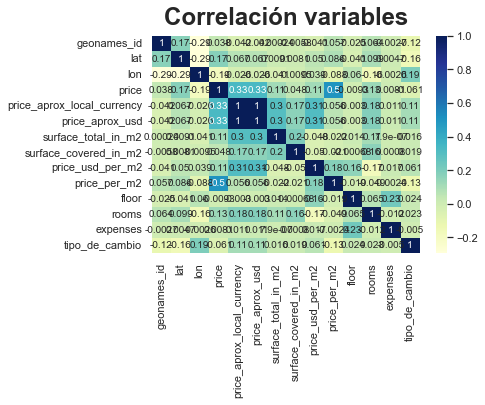

In [16]:
#Generamos un heatmap con las columnas para poder ver la correlacion de las mismas
i = sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")
i.set_title('Correlación variables', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')

### **Correlacion entre columnas relacionadas al precio**

Text(0.5, 1.0, 'Correlación columnas de precio')

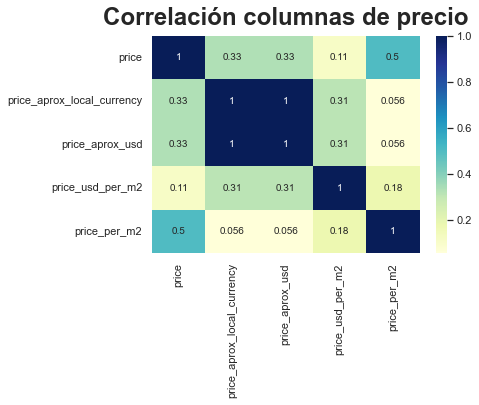

In [17]:
#Analisis con un grafico heatmap para encontrar correlaciones en las columnas relacionadas al precio de las propiedades
h= sns.heatmap(data.loc[:,['price','price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2','price_per_m2']].corr(),annot=True, cmap="YlGnBu")
h.set_title('Correlación columnas de precio', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')


### **Grafico de barras precio promedio por metro cuadrado por tipo de propiedad**

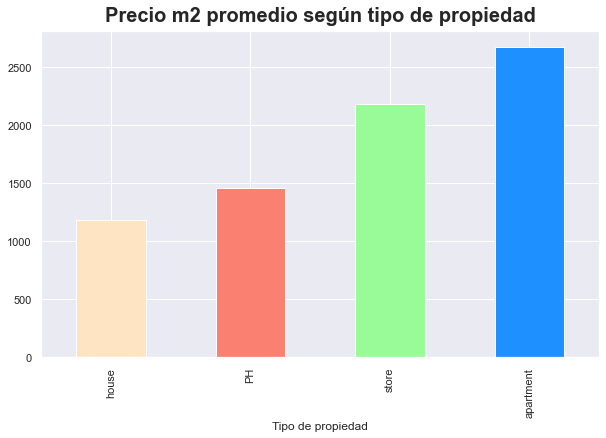

In [18]:
#Generamos un barplot para poder ver el precio promedio del valor del m2 segun el tipo de propiedad
h = data.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
h.plot.bar(figsize=(10,6), color=['bisque', 'salmon', 'palegreen', 'dodgerblue'])
plt.xlabel('Tipo de propiedad')
plt.title('Precio m2 promedio según tipo de propiedad', fontdict = {'fontsize': 20,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

### **Countplot cantidad de propiedades que hay por zona/provincia**

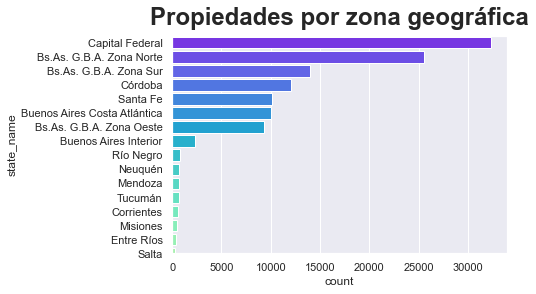

In [19]:
#Realizamos un countplot para poder ver la cantidad de propiedades que hay por zona/provincia para despues poder determinar 
g = sns.countplot(data=df, y="state_name",palette="rainbow" , order = data['state_name'].value_counts().index);
g.axes.set_ylim(15)
g.set_title('Propiedades por zona geográfica',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
sns.set(rc={"figure.figsize":(12, 6)})

###**Pie chart distribución de tipo de propiedad**

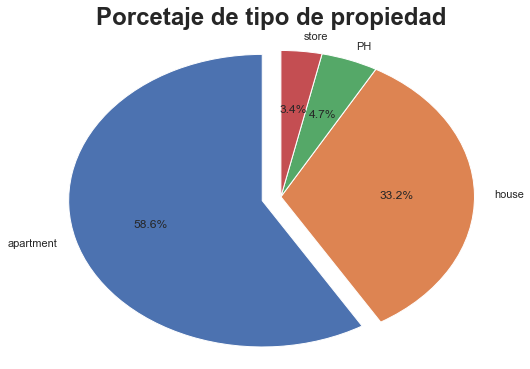

In [20]:
#Hicimos un grafico de torta para poder ver la distribucion de tipo de propiedad
data_pie_propety_type = data.property_type.value_counts()
tipo_propiedad = ['apartment', 'house', 'PH', 'store']

explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(data_pie_propety_type, explode=explode, labels=tipo_propiedad, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('auto')
ax1.set_title('Porcetaje de tipo de propiedad', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

### **Scaterplot para analizar correlacion entre precios en USD y ARS**

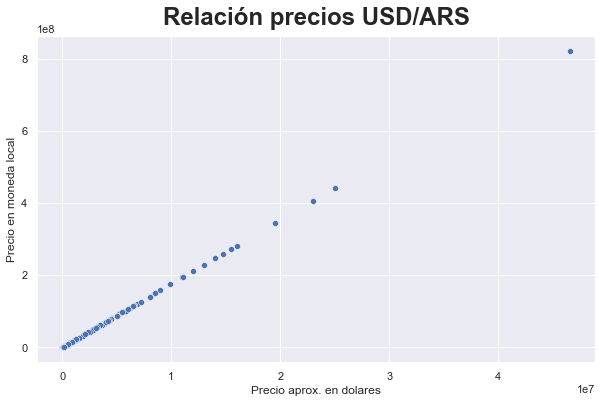

In [21]:
#Generamos un scaterplot para ver correlacion de datos entre el precio local que serian "ARS" y el precio en dolares "USD"
#la correlacion es 1 a 1

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="price_aprox_usd", y="price_aprox_local_currency");

plt.xlabel("Precio aprox. en dolares"); plt.ylabel("Precio en moneda local");
plt.title("Relación precios USD/ARS", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()



###**Kernel Density plot ambientes y superficie** 

C:\Users\alejo\AppData\Local\Temp\ipykernel_16304\641159768.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='rooms', shade=True)


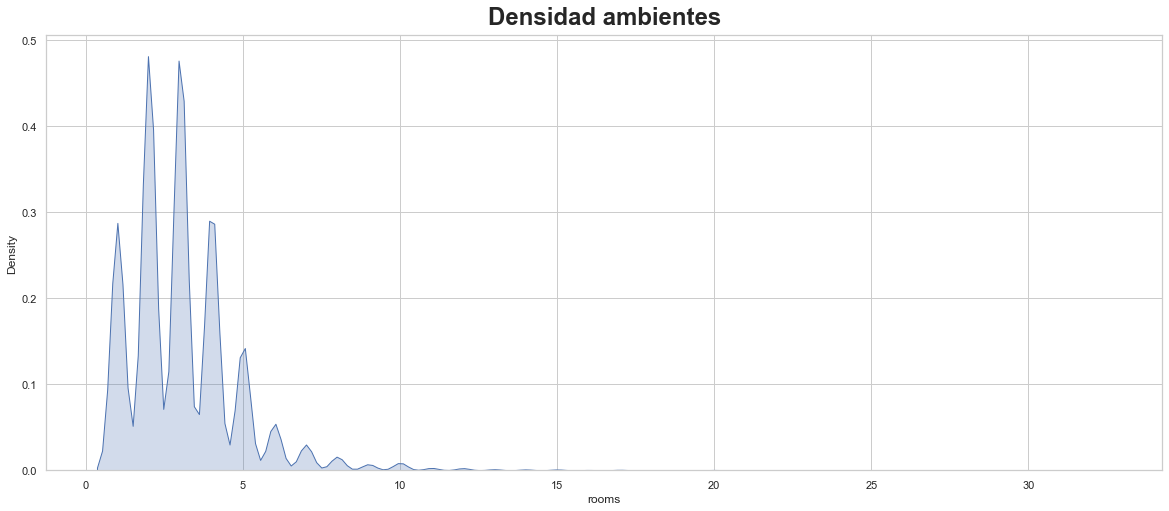

In [22]:
#Podemos observar la densidad de los datos equivalentes a los ambientes ("rooms"), donde podemos obvservar valores atipicos a partir de las 15/20 rooms
fig = plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.kdeplot(data=data, x='rooms', shade=True)
plt.title('Densidad ambientes',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_16304\1892580233.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='surface_covered_in_m2', shade=True)


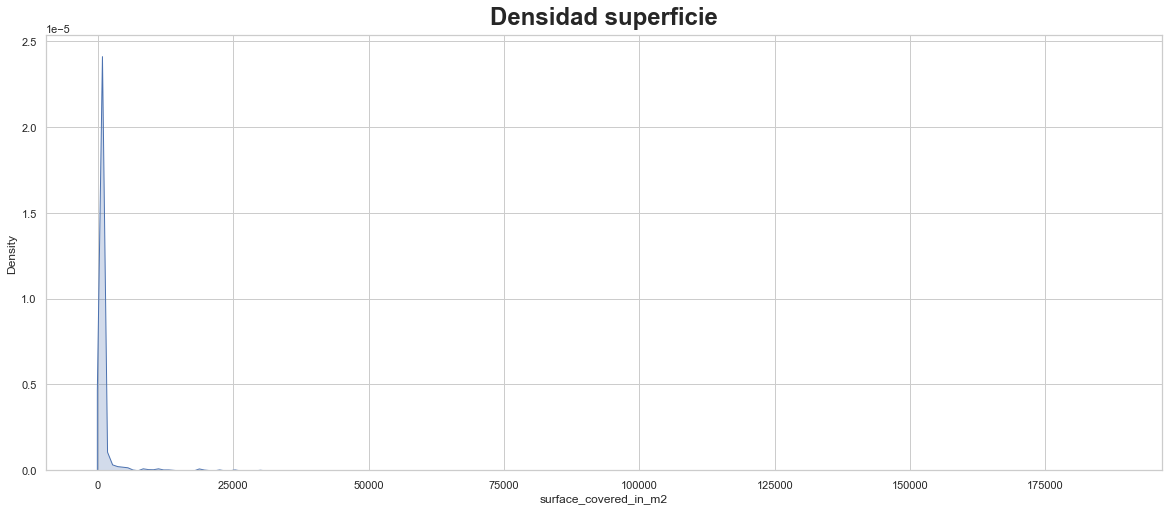

In [23]:
#Lo mismo podemos observar en la columna superficie cubierta en m2
fig = plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.kdeplot(data=data, x='surface_covered_in_m2', shade=True)
plt.title('Densidad superficie',fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

### **Revisamos el criterio de calculo de precio por superficie**

In [24]:
# no es claro el criterio que se utiliza para calcular el precio por superficie, despues de usar regex para superficie vamos a corregirlo
data[['price', 'currency','price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2','price_per_m2','price_usd_per_m2']]

,price,currency,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2
0,62000.0,USD,62000.0,40.0,55.0,1550.000000,1127.272727
1,150000.0,USD,150000.0,NaN,NaN,NaN,NaN
2,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909
3,95000.0,USD,95000.0,NaN,NaN,NaN,NaN
4,64000.0,USD,64000.0,35.0,35.0,1828.571429,1828.571429
...,...,...,...,...,...,...,...
121215,870000.0,USD,870000.0,93.0,113.0,9354.838710,7699.115044
121216,498000.0,USD,498000.0,360.0,360.0,1383.333333,1383.333333
121217,131500.0,USD,131500.0,39.0,46.0,3371.794872,2858.695652
121218,95900.0,USD,95900.0,48.0,48.0,1997.916667,1997.916667


### **Relacion entre precio y ambientes (rooms) de la propiedad**

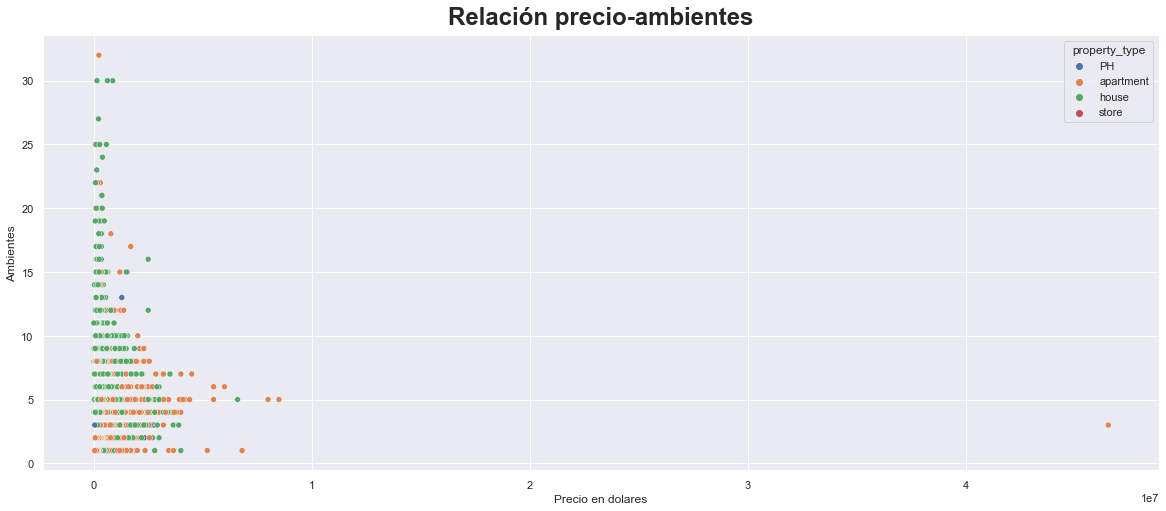

In [25]:
#Podemos notar que comparando precio y ambientes de las viviendas no tenemos mucha correlacion ya que los datos son bastante uniformes
sns.set_style('darkgrid')
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x="price_aprox_usd", y="rooms", hue='property_type')

plt.xlabel("Precio en dolares"); plt.ylabel("Ambientes");
plt.title("Relación precio-ambientes", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()


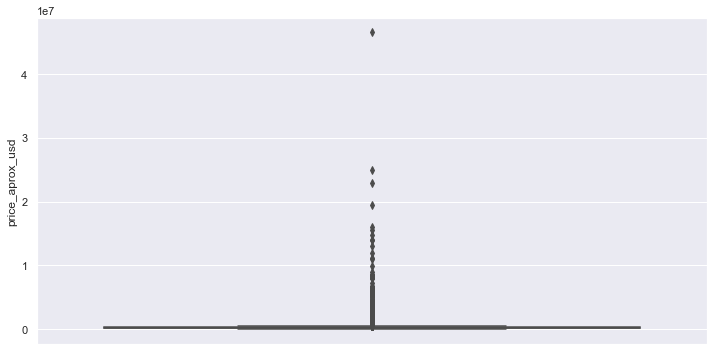

In [26]:
sns.boxplot(y=data["price_aprox_usd"]);

In [27]:
# asumimos los mayores al 3Q como outliers
data.price_aprox_usd.describe().round()

count      100810.0
mean       239701.0
std        391324.0
min             0.0
25%         89734.0
50%        145000.0
75%        265000.0
max      46545445.0
Name: price_aprox_usd, dtype: float64

In [28]:
mask_sin_outlier = data.price_aprox_usd < data.price_aprox_usd.quantile(0.75)
data_sin_outlier = data[mask_sin_outlier]

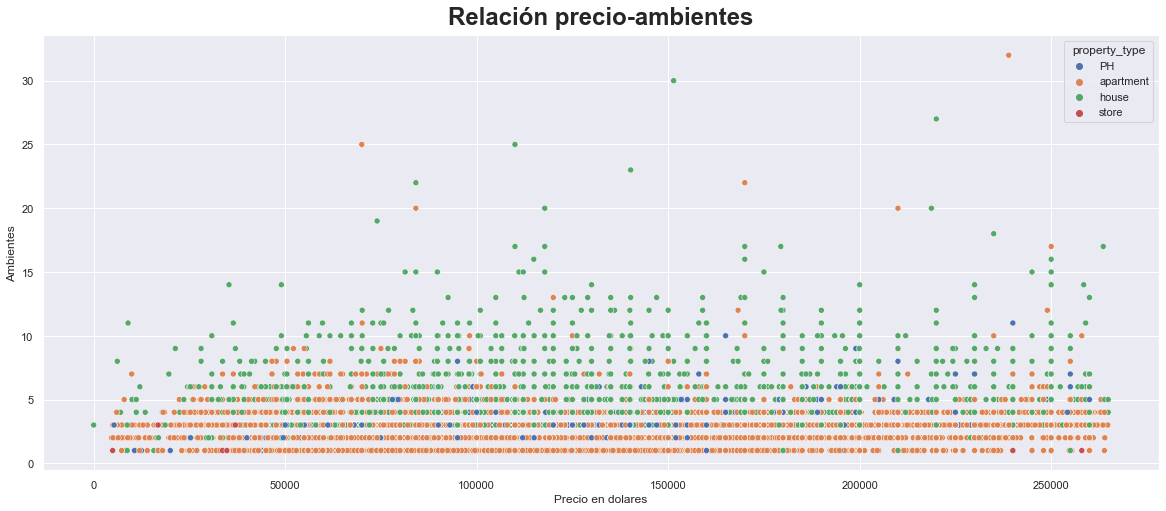

In [29]:
#Volvemos a graficar las variables price y rooms pero sin valores atipicos
sns.set_style('darkgrid')
plt.figure(figsize=(20, 8))
sns.scatterplot(data=data_sin_outlier, x="price_aprox_usd", y="rooms", hue='property_type')

plt.xlabel("Precio en dolares"); plt.ylabel("Ambientes");
plt.title("Relación precio-ambientes", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

### **Análisis de las columnas 'SURFACE'**

In [30]:
# Analizamos rápidamente la distribucón de valores nulos en las dos columnas.
# Encontramos 7538 propiedades que no tienen cargada superficie cubierta pero sí superficie total.
data.surface_total_in_m2.notnull().value_counts()

True     81892
False    39328
Name: surface_total_in_m2, dtype: int64

In [31]:
data.surface_covered_in_m2.notnull().value_counts()

True     101313
False     19907
Name: surface_covered_in_m2, dtype: int64

In [32]:
# Ahora hacemos lo mismo para las propieades que no tienen cargada superficie total y sí tienen cargada superficie cubierta.
# Encontramos 26959 propiedades que tienen cargada superficie cubierta pero no tienen cargada superficie total.
mask_sin_sup_total = data.surface_total_in_m2.isnull()
mask_sup_cubierta = data.surface_covered_in_m2.notnull()
data[mask_sin_sup_total & mask_sup_cubierta].shape

(26959, 26)

In [33]:
# Nos fijamos ahora cuántas propiedades tienen más superficie cubierta que superficie total. Podría tratarse de propiedades de 2 pisos o más.

data[data.surface_covered_in_m2 > data.surface_total_in_m2].shape

(1106, 26)

In [34]:
# Analizamos algunas muestras de los 351 departamentos para ver en su descripción si se tratan de departamentos tipo loft que justifiquen la sup cubierta.

deptos_supcubiertamayor = data[(data.surface_covered_in_m2 > data.surface_total_in_m2) & (data.property_type == 'apartment')]
deptos_supcubiertamayor[['surface_total_in_m2', 'surface_covered_in_m2', 'floor','description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,floor,description
42848,319.0,330.0,1.0,CARACTERISTICAS Superficie Terreno: 330 m2Supe...
108162,50.0,110.0,NaN,CODIGO: 916-69668 ubicado en: Paraguay 3000 - ...
54897,60.0,62.0,NaN,En venta. En venta. Departamento 2 amb a la ca...
41974,40.0,42.0,NaN,Departamento de 1 Dormitorio. Cocina separada ...
106948,98.0,102.0,NaN,CODIGO: 1237-141 ubicado en: Juncal 4600 - Pu...


In [35]:
# Por las descripciones observadas parece que están mal cargados los datos. PROPUESTA: intercambiar columnas. Chequeamos antes con regex por "loft" o "Plantas".
pattern_loft = "loft"
pattern_loft_regex = re.compile(pattern_loft, flags = re.IGNORECASE)
matches_loft = deptos_supcubiertamayor.description.apply(lambda x: np.nan if x is np.nan else pattern_loft_regex.search(x))
mask_loft = matches_loft.notnull()

pattern_plantas = "plantas"
pattern_plantas_regex = re.compile(pattern_plantas, flags = re.IGNORECASE)
matches_plantas = deptos_supcubiertamayor.description.apply(lambda x: np.nan if x is np.nan else pattern_plantas_regex.search(x))
mask_plantas = matches_plantas.notnull()

deptos_supcubiertamayor[mask_loft | mask_plantas].shape

(12, 26)

In [36]:
# Solo doce departamentos con las palabras "loft" o "plantas" en su descripción y tienen sup cubierta > a superficie total. Los vemos en detalle:
with pd.option_context('display.max_colwidth', 500):
  display(deptos_supcubiertamayor[mask_loft | mask_plantas])

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,tipo_de_cambio
27530,sell,apartment,Banfield,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zamora|Banfield|,Argentina,Bs.As. G.B.A. Zona Sur,3436152.0,"-34.7390389,-58.3892991",-34.739039,-58.389299,...,2857.142857,1379.310345,NaN,4.0,NaN,http://www.properati.com.ar/17ttf_venta_departamento_banfield_balcon_hidromasaje_lavadero_parrilla_patio_quincho_terraza_toilette_garage_placard_tersigni-propiedades_fnl,"CHALET TIPO DUPLEX DE 3 DORMITORIOS EN 3 PLANTAS AMPLIO LIVING COMEDOR CON PISOS DE PORCELANATO - TOILETTE DE RECEPCION - COCINA CON MUEBLES BAJO Y SOBREMESADA Y BARRA DESAYUNADORA - LAVADERO, PATIO Y GARAGE CUBIERTO PARA UN AUTO CON PORTON AUTOMATICO. PA: POR ESCALERA DE MADERA, PASILLO DISTRIBUIDOR - 3 HABITACIONES CON PLACARD (DOS CON BALCON) - BAÑO COMPLETO CON ANTEBAÑO E HIDROMASAJE - QUINCHO CON PARRILLA EN LA TERRAZA - EXCELENTE ESTADO - LA PROPIEDAD SE ENTREGA SIN EL ARTEFACTO DE COC...",Banfield - Excelente duplex 3 dormitorios,https://thumbs4.properati.com/6/re9VRp-1Dgacff9xxmB59IaUUlk=/trim/198x0/smart/filters:strip_icc()/inmokey-media.s3-website-sa-east-1.amazonaws.com/properties/2/1/p-194521-030417105342-151862.jpg,17.6445
28456,sell,apartment,Canning,|Argentina|Bs.As. G.B.A. Zona Sur|Esteban Echeverría|Canning|,Argentina,Bs.As. G.B.A. Zona Sur,3435719.0,"-34.8853928566,-58.5126642791",-34.885393,-58.512664,...,8364.285714,2545.652174,NaN,NaN,NaN,http://www.properati.com.ar/17w75_venta_departamento_canning_jardin_parrilla_garage_velazquez-mann-propiedades,"CODIGO: ubicado en: Espacio las Cavas - Publicado por: VELAZQUEZ MANN PROPIEDADES. El precio es de USD 117100 null. Departamento en Venta en el nuevo complejo ESPACIO LAS CAVAS, ubicado en Champagnat y Montes de Oca, a la altura de la entrada de Saint Thomas Country Club. La Unidad es de 2 ambientes, de 46,26 m2, ubicado en PB con jardín de 14,62 m2, con cochera. Emplazado en una zona de arboledas y quintas. El complejo está compuesto por 40 departamentos sobre un terreno de 6.400 m2. • ...",Departamento en venta en Espacio Las Cavas,https://thumbs4.properati.com/1/xgYB-RkfKWao3KBvGEzBn-Cn7qA=/trim/198x0/smart/filters:strip_icc()/images.mapapropapp.com/mapaprop-images/photos/2469/128402/1140943.jpg,17.6445
28457,sell,apartment,Ezeiza,|Argentina|Bs.As. G.B.A. Zona Sur|Ezeiza|,Argentina,Bs.As. G.B.A. Zona Sur,3433975.0,"-34.8853928566,-58.5126642791",-34.885393,-58.512664,...,8364.285714,2545.652174,NaN,NaN,NaN,http://www.properati.com.ar/17w76_venta_departamento_ezeiza_jardin_parrilla_garage_velazquez-mann-propiedades,"CODIGO: B ubicado en: Espacio las Cavas - Publicado por: VELAZQUEZ MANN PROPIEDADES. El precio es de USD 117100 null. Departamento en Venta en el nuevo complejo ESPACIO LAS CAVAS, ubicado en Champagnat y Montes de Oca, a la altura de la entrada de Saint Thomas Country Club. La Unidad es de 2 ambientes, de 46,26 m2, ubicado en PB con jardín de 14,62 m2, con cochera. Emplazado en una zona de arboledas y quintas. El complejo está compuesto por 40 departamentos sobre un terreno de 6.400 m2. •...",Departamento en venta en Espacio Las Cavas,https://thumbs4.properati.com/1/G3ZFkDcxEoQMADv9rTrJfygbdJg=/trim/198x0/smart/filters:strip_icc()/images.mapapropapp.com/mapaprop-images/photos/2469/128403/1140953.jpg,17.6445
41962,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4263065,-64.1921431",-31.426306,-64.192143,...,1958.477460,24444.444444,NaN,NaN,NaN,http://www.properati.com.ar/18vf7_venta_departamento_cordoba_balcon_la-docta-inmobiliaria,"TRAS UNA ELEGANTE FACHADA, ESTA MODERNA TORRE CUENTA CON 13 PISOS DE ALTURA, DONDE INCORPORA 2 DEPARTAMENTOS EN VENTA POR PLANTA. LAS UNIDADES TIENEN ÁREAS QUE OSCILAN ENTRE LOS 43 M2 Y LOS 68 M2 PROPIOS, SEGÚN SU TIPOLOGÍA. OFRECE AMPLIOS DUPLEX DE DOS DORMITORIOS CON DOS BA

In [37]:
deptos_supcubiertamayor[mask_loft | mask_plantas][['surface_total_in_m2', 'surface_covered_in_m2', 'description']]

,surface_total_in_m2,surface_covered_in_m2,description
27530,70.0,145.0,CHALET TIPO DUPLEX DE 3 DORMITORIOS EN 3 PLANT...
28456,14.0,46.0,CODIGO: ubicado en: Espacio las Cavas - Publ...
28457,14.0,46.0,CODIGO: B ubicado en: Espacio las Cavas - Pub...
41962,63.0,90.0,"TRAS UNA ELEGANTE FACHADA, ESTA MODERNA TORRE ..."
41963,40.0,60.0,"TRAS UNA ELEGANTE FACHADA, ESTA MODERNA TORRE ..."
46989,120.0,130.0,SAN ISIDRO LOFTS - PB - UF: 14 (Castelli 1077)...
57917,53.0,80.0,LOFT EN 2 PLANTAS CON JARDÍN VERDE Y COCHERA. ...
59241,52.0,79.0,LOFT EN 2 PLANTAS CON JARDÍN VERDE Y COCHERA. ...
88955,76.0,108.0,Venta o alquiler de departamento de tres ambie...
90883,10.0,45.0,Venta de departamento de dos ambientes. En dup...


### **Análisis de datos cargados en columna 'ROOMS'.**

Text(0.5, 1.0, 'Boxplot de rooms por tipo de propiedad')

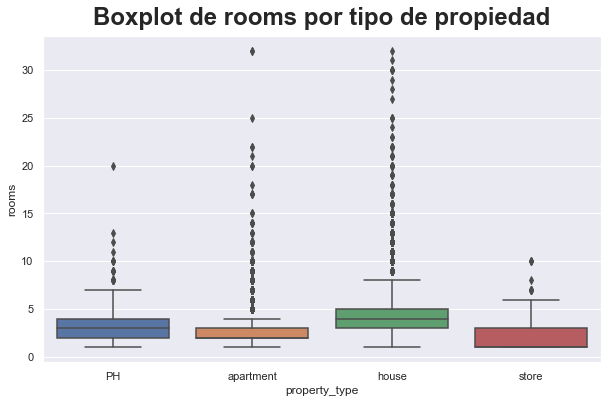

In [38]:
# Analizamos con un BOXPLOT posibles outliers en la cantidad de ROOMS por categoría PROPERTY_TYPE.

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="property_type", y="rooms")
plt.title("Boxplot de rooms por tipo de propiedad", fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')


In [39]:
# Observamos que hay departamentos con > 10 ROOMS. A priori no sería víable. Analizamos la relación entre los m2 cubiertos de superficie y rooms para
# propiedades con > 10 rooms.
mask_apartment = data.property_type == 'apartment'
mask_rooms = data.rooms >= 10
deptos_10_amb = data.loc[mask_apartment & mask_rooms,['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'description']]
with pd.option_context('display.max_colwidth', 500):
  display(deptos_10_amb.sample(5))

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,description
119355,790000.0,NaN,1300.0,NaN,18.0,"Corredor Responsable: Edgardo Tamarit - CPCPI 4228Contacto: Mariana Boras - MLS ID # 420401102-5VENTA DE EXCELENTE COMPLEJO EN VILLA CARLOS PAZ ¡ ATENCIÓN INVERSORES ! REMAX ofrece una excelente oportunidad en VILLA CARLOS PAZ El complejo cuenta con: - 3 departamentos de 1 dormitorio, cocina comedor, baño . - 2 departamentos de 2 dormitorios, cocina comedor, baño -Terraza con asadores -Deck con HERMOSA VISTA a la ciudad - Garage para 4 autos - Gran patio con piscina de 10x6 - Una ..."
37951,370000.0,400.0,300.0,NaN,11.0,Piso único restaurado con aberturas originalesPisos de roble y pinoteaGalería con vidrios repartidos y pisos calcáreosTerraza en mismo nivel de 100 m2Todo luz9 habitaciones4 bañosSe acepta propiedad de 150 m2 a cuenta de pago
13044,1200000.0,366.0,363.0,NaN,12.0,"- Excelente piso de 375m en edificio Francés de gran categoría.- Apto profesional.- Frente al Hotel Sofitel.- Pisos edificio: 4- Imponente entrada al edificio con gran escalera circular en mármol (se ve en las fotos).Actualmente se encuentra acondicionado para oficina (ultima: agencia de publicidad) sin alterar los detalles propios de la construcción.- Todas las conexiones y cableados con instalación interna, luminarias embutidas y pisos alfombrados, resultando un espacio prolijo y ordenado...."
8413,950000.0,518.0,518.0,NaN,10.0,"PISO DE GRAN CATEGORÍA a metros de Cancillería y plaza San Martín.Amplio hall de entrada (6x5) con piso damero original y chimenea. Cómodos Living (8,40 x 5,50), Comedor (8,50 x 6) y Escritorio (5,50 x 3,80).6 Dormitorios (5,50 x 4,30) (4,80 x 4,60) (4,80 x 4) (4.05 x 3,70) (5,40 x 4,00) (3,60 x 4). 3 Baños completos con paredes de mármol de carrara. Cocina, comedor diario. 2 Dependencias de servicio + cuarto de chófer.Baulera.Detalles de estilo, techos altos con molduras y pisos de roble co..."
24159,2025000.0,604.0,450.0,NaN,10.0,"Espectacular triplex, super exclusivo, en la mejor zona de Buenos Aires, La Isla.El departamento es el penthouse del edificio y cuenta con una ubicación especial dentro de la isla, ya que al estar ubicado en la manzana que se ingresa por Copérnico y da por el contrafrente a Av Las Heras, o sea que tiene frente mirando al río y frente mirando a la ciudad.En un edificio de categoría que tiene seguridad las 24 hs, salón de fiestas y gimnasio.En el piso 10 se encuentra el palier privado, un hall..."


In [40]:
# Se observa en prácticamente todos los samples que no coincide la descripción de la propiedad con la cantidad de ROOMS cargados.
# Se podría proponer remplazar estos valores por la cantidad de ambientes descriptos en la columna 'description'.

### **Análisis de la columna 'FLOOR'**

In [41]:
# Analizamos primero la distribución estadística de los valores para luego poder graficar.

data['floor'].describe(exclude = np.nan)

count    7899.000000
mean       17.452336
std       120.243621
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max      3150.000000
Name: floor, dtype: float64

In [42]:
# Visualizamos las descripciones de las 5 casas con valor más grande de 'floor' para ver si se puede identificar el origen del dato.
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
data.iloc[list(data[data.property_type == 'house'].floor.nlargest(5).index)].loc[:,['floor', 'description']]

floor  \
39394  3150.0   
60483  2177.0   
30407  1512.0   
19420  1450.0   
30093  1420.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [43]:
# No se puede identificar qué se quiso cargar en el campo FLOOR para estas viviendas.

# **Eliminación de columnas que no son de interés para el análisis de este trabajo**

- **image_thumbnail** y **properati_url** enlaces a la publicacion de la propiedad y hacia una imagen de la propiedad
- **lat-lon** concatena columnas lat y lon
- **operation** y **country_name** todos los registros contienen el mismo valor

In [44]:
# volvemos a chequear las columnas con un unico valor
for col in data.columns:
    if data[col].nunique() == 1:
      print('\n-- -- -- --')
      print(f'Nombre del campo: {col}')
      print(data[col].value_counts())


-- -- -- --
Nombre del campo: operation
sell    121220
Name: operation, dtype: int64

-- -- -- --
Nombre del campo: country_name
Argentina    121220
Name: country_name, dtype: int64


In [45]:
data.drop(['properati_url','image_thumbnail','lat-lon','operation','country_name'], axis=1, inplace=True)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'tipo_de_cambio'],
      dtype='object')

# Tratamiento de nulos y corrección de valores érroneos

**Accionar por columna**
- **place name** reemplazamos usando place with parent names
- **geo names id**: utilizamos este campo para ver duplicados, no imputaremos los nulos 
- **lat, lon**: no utilizamos estas columnas y son datos geograficos precisos, no imputaremos los nulos
- **price, currency, aprox_local_currency, _aprox_usd**: decidimos no predecir precios ya que con esta variable vamos a trabajar luego en el modelo de regresion y buscamos que se asemeje lo maximo posible a la realidad
- **surface_total_in_m2 y surface_covered_in_m2** : buscando en la descripicon logramos imputar valores, tanto nulos como otros mal cargados en las columnas correspondientes. Además, se hicieron análisis detallados de valores muy chicos o muy altos, y también completación de una columna en función de lo cargado en la otra, en los casos que correspondía.
- **price per m2**: recalculamos esta columna ya que no era claro el calculo con el que se completo la columna originalmente. Ademas, se tomaba el campo precio sin tener en cuenta que puede ser de diferentes monedas, por ende buscamos homogeneizar dicha informacion
- **floor** : no es claro el objetivo de la columna, ya sea mostrar el piso en el que se encuentra el departamento o la cantidad de pisos que tiene la propiedad. Por otro lado, encontramos valores atipicos para el tipo de informacion que deberia mostrar la columna. Su gran cantidad de nulos y no poder encontrar en la descripcion la informacion necesaria para completarla nos llevo a pensar que la mejor opcion es quitarla del set de datos 
- **expenses**: tiene gran cantidad de nulos, usamos regex para completarla pero igualmente no se logro imputar una cantidad relevante 
- **rooms**: imputamos datos con regex buscando la cantidad de ambientes en la descripcion o en el titulo, tambien con habitaciones
- **description** tiene apenas dos nulos, informacion util para buscar datos

In [46]:
# Listamos solo los campos con nulos
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f'{col} ==> {data[col].isnull().sum()} = {round(data[col].isnull().sum()/data.shape[0]*100,2)}%')

place_name ==> 23 = 0.02%
geonames_id ==> 18717 = 15.44%
lat ==> 51550 = 42.53%
lon ==> 51550 = 42.53%
price ==> 20410 = 16.84%
currency ==> 20411 = 16.84%
price_aprox_local_currency ==> 20410 = 16.84%
price_aprox_usd ==> 20410 = 16.84%
surface_total_in_m2 ==> 39328 = 32.44%
surface_covered_in_m2 ==> 19907 = 16.42%
price_usd_per_m2 ==> 52603 = 43.39%
price_per_m2 ==> 33562 = 27.69%
floor ==> 113321 = 93.48%
rooms ==> 73830 = 60.91%
expenses ==> 106958 = 88.23%
description ==> 2 = 0.0%
tipo_de_cambio ==> 20411 = 16.84%


# Imputar columna latitud y longitud usando dataset externo
Para esto usamos [GeoNames](https://www.geonames.org/); una base de datos geográfica gratuita y accesible a través de Internet bajo una licencia Creative Commons Reconocimiento 3.0.

In [47]:
geonames = pd.read_csv('data/AR.txt', sep="\t", header=None)
geonames.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3427200,Sierra del 15,Sierra del 15,NaN,-37.96613,-57.94670,T,HLL,AR,NaN,1.0,6357.0,NaN,NaN,0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30
1,3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,NaN,-28.63333,-56.11667,S,HSE,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,79,America/Argentina/Cordoba,2016-01-30
2,3427202,Cañada del Zorro,Canada del Zorro,NaN,-32.16667,-59.50000,H,STM,AR,NaN,8.0,NaN,NaN,NaN,0,NaN,65,America/Argentina/Cordoba,1993-12-21
3,3427203,Estancia Zorraquín,Estancia Zorraquin,NaN,-31.51553,-58.55208,S,RNCH,AR,NaN,8.0,30113.0,NaN,NaN,0,NaN,71,America/Argentina/Cordoba,2016-01-30
4,3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,NaN,-28.43825,-56.08838,S,RNCH,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,98,America/Argentina/Cordoba,2016-01-30


In [48]:
# renombramos las columnas que nos interesan del df geonames para que sea mas legible 
geonames.rename(columns={0:'geonames_id',4:'latitude',5:'longitude'}, inplace=True)

In [49]:
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'tipo_de_cambio'],
      dtype='object')

In [50]:
geonames.columns

Index(['geonames_id',             1,             2,             3,
          'latitude',   'longitude',             6,             7,
                   8,             9,            10,            11,
                  12,            13,            14,            15,
                  16,            17,            18],
      dtype='object')

In [51]:
# hacemos un merge usando left join 
data = pd.merge(data, geonames[['geonames_id','latitude','longitude']], how='left', left_on = 'geonames_id', right_on = 'geonames_id')
data.isnull().sum()

property_type                      0
place_name                        23
place_with_parent_names            0
state_name                         0
geonames_id                    18717
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
description                        2
title                              0
tipo_de_cambio                 20411
latitude                       19171
longitude                      19171
dtype: int64

Imputamos las columnas lat y lon


In [52]:
data[['lon','lat','longitude','latitude']]

,lon,lat,longitude,latitude
0,-58.508839,-34.661824,-58.50000,-34.66667
1,-57.964330,-34.903883,-58.00000,-35.00000
2,-58.522982,-34.652262,-58.50000,-34.66667
3,-58.516424,-34.647797,-58.52386,-34.64286
4,-57.549447,-38.002626,NaN,NaN
...,...,...,...,...
121215,NaN,NaN,-58.45829,-34.56270
121216,NaN,NaN,-58.53481,-34.46312
121217,-58.475596,-34.570639,-58.48333,-34.56667
121218,NaN,NaN,NaN,NaN


In [53]:
data[data.lat.isnull() & data.latitude.notnull()][['lat','latitude']]

,lat,latitude
13,NaN,-34.58856
14,NaN,-34.58856
42,NaN,-34.41667
49,NaN,-34.33333
62,NaN,-34.83333
...,...,...
121213,NaN,-34.49397
121214,NaN,-34.49009
121215,NaN,-34.56270
121216,NaN,-34.46312


In [54]:
# reemplazamos las filas donde encontramos nulos en lat y no en latitude
data.loc[(data.lat.isnull() & data.latitude.notnull()), 'lat'] = data['latitude']

In [55]:
data.lat.isnull().sum()

8346

In [56]:
data[data.lon.isnull() & data.longitude.notnull()][['lon','longitude']]

,lon,longitude
13,NaN,-58.43053
14,NaN,-58.43053
42,NaN,-58.83333
49,NaN,-58.75000
62,NaN,-58.16667
...,...,...
121213,NaN,-58.51679
121214,NaN,-58.53028
121215,NaN,-58.45829
121216,NaN,-58.53481


In [57]:
# repetimos el mismo proceso para lon
data.loc[(data.lon.isnull() & data.longitude.notnull()), 'lon'] = data['longitude']

In [58]:
data.lon.isnull().sum()

8346

In [59]:
# borramos las columnas del merge que ya no son de utilidad
data.drop(columns=['latitude','longitude'], inplace=True)
data.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'tipo_de_cambio'],
      dtype='object')

# Análisis columna **place_with_parent_names** 

Dividimos en diferentes columnas y con estos mismos datos reemplazamos los valores nulos en la columna place_name

In [60]:
data[['place_with_parent_names']]

,place_with_parent_names
0,|Argentina|Capital Federal|Mataderos|
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,|Argentina|Capital Federal|Mataderos|
3,|Argentina|Capital Federal|Liniers|
4,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|
...,...
121215,|Argentina|Capital Federal|Belgrano|
121216,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|Beccar|
121217,|Argentina|Capital Federal|Villa Urquiza|
121218,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Colón|


In [61]:
# Division de la columna "place_with_parent_names" en diferentes columnas
data['provincia'] = data['place_with_parent_names'].map(lambda x: x.split('|')[2])


In [62]:
#Reemplazamos los valores nulos de la columna 'place_name' por los valores de la columna creada a partir de la columna 'place_with_parent_names'
data['place_name'] = data.apply(lambda x: x['provincia'] if x['place_name'] is np.nan else x['place_name'], axis=1 )
print(f'Ahora la columna de place_name contiene {data.place_name.isnull().sum()} nulos')

Ahora la columna de place_name contiene 0 nulos


In [63]:
# El caso de la capital es diferente porque tiene un nivel menos de apertura de la ubicacion, por eso tuvimos que tratarlo de otro modo 
data['ciudad_partido'] = data['place_with_parent_names'].map(lambda x: x.split('|')[2] if 'Capital' in x.split('|')[2] else x.split('|')[3])
data['barrio'] = data['place_with_parent_names'].map(lambda x: x.split('|')[3] if 'Capital' in x.split('|')[2] else x.split('|')[3] if 'Bs.As.' in x.split('|')[2] and x.count('|') <5 else x.split('|')[4] if  x.count('|') >= 5 else np.nan)


In [64]:
data.loc[:,['provincia','ciudad_partido','barrio']].sample(10)

,provincia,ciudad_partido,barrio
109059,Bs.As. G.B.A. Zona Norte,Escobar,Escobar
107142,Chubut,Cushamen,NaN
80471,Capital Federal,Capital Federal,San Telmo
61677,Capital Federal,Capital Federal,Villa Crespo
5507,Buenos Aires Costa Atlántica,Mar del Plata,NaN
58952,Capital Federal,Capital Federal,Parque Patricios
5748,Bs.As. G.B.A. Zona Norte,San Isidro,Boulogne Sur Mer
114238,Buenos Aires Costa Atlántica,Mar del Plata,NaN
75743,Bs.As. G.B.A. Zona Norte,Tigre,Tigre
25448,Santa Fe,Rosario,NaN


In [65]:
data[data.provincia =='Buenos Aires Interior'][['place_with_parent_names','provincia','ciudad_partido','barrio']]

,place_with_parent_names,provincia,ciudad_partido,barrio
123,|Argentina|Buenos Aires Interior|Luján|,Buenos Aires Interior,Luján,NaN
138,|Argentina|Buenos Aires Interior|Exaltación de la Cruz|,Buenos Aires Interior,Exaltación de la Cruz,NaN
197,|Argentina|Buenos Aires Interior|Lobos|Empalme Lobos|,Buenos Aires Interior,Lobos,Empalme Lobos
297,|Argentina|Buenos Aires Interior|Luján|,Buenos Aires Interior,Luján,NaN
306,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,Bahía Blanca,NaN
...,...,...,...,...
120163,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,Bahía Blanca,NaN
120176,|Argentina|Buenos Aires Interior|General Pueyrredón|Sierra de los Padres|,Buenos Aires Interior,General Pueyrredón,Sierra de los Padres
120183,|Argentina|Buenos Aires Interior|Bahía Blanca|,Buenos Aires Interior,Bahía Blanca,NaN
120206,|Argentina|Buenos Aires Interior|Balcarce|,Buenos Aires Interior,Balcarce,NaN


In [66]:
# A pesar de aportar mejor presición para el análisis de la propiedad, la columna barrios contiene muchos nulos
print(f'La columna barrios tiene {data.barrio.isnull().sum()}')

La columna barrios tiene 37293


In [67]:
# En capital no encontramos nulos en la columna barrio, esto resulta de utilidad para poder segmentar el analisis
data[data.provincia == 'Capital Federal'].barrio.isnull().sum()

0

In [68]:
mask_amba = (data.provincia == 'Capital Federal')\
|(data.provincia == 'Capital Federal')\
|(data.provincia == 'Bs.As. G.B.A. Zona Norte')\
|(data.provincia == 'Bs.As. G.B.A. Zona Sur')\
|(data.provincia == 'Bs.As. G.B.A. Zona Oeste')


In [69]:
# definimos una mascara para la region del amba y tampoco encontramos nulos en la columna barrio
#esto nos permitiria trabajar con todos los datos de esta region en cuanto a la localizacion 
amba = data[mask_amba]
amba.barrio.isnull().sum()

0

#Análisis y tratamiento de nulos columna **rooms**

Text(0.5, 1.0, 'Distribución de nulos en "rooms".')

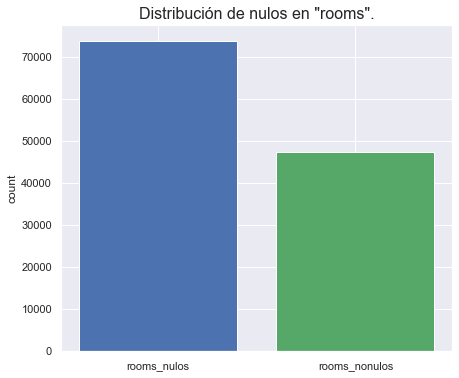

In [70]:
# Graficamos primero la cantidad de nulos y valores cargados.

sns.set()
fig, ax = plt.subplots(figsize = (7,6))
ax.set_ylabel('count')
ax.bar('rooms_nulos', data.rooms.isnull().sum(), color = 'b')
ax.bar('rooms_nonulos', data.rooms.notnull().sum(), color = 'g')
ax.set_title('Distribución de nulos en "rooms".', fontsize = 16)


# Si esta celda devuelve un error reiniciar el entorno y ejecutar nuevamente

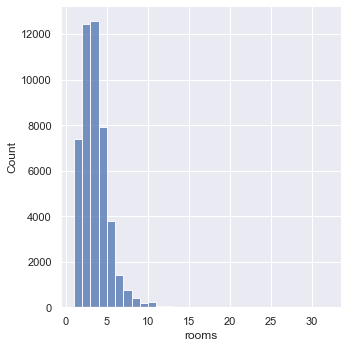

In [71]:
# ploteamos la distribucion de rooms con datos crudos
sns.displot(data, x="rooms", binwidth=1)

In [72]:
# Ahora analizamos cómo es la distribución de los valores de rooms por 'property_type':

rooms_categories = pd.cut(data.rooms, bins = 6)
data.pivot_table(values='rooms', index='property_type', columns=rooms_categories, aggfunc='count', fill_value = 0)

rooms,"(0.969, 6.167]","(6.167, 11.333]","(11.333, 16.5]","(16.5, 21.667]","(21.667, 26.833]","(26.833, 32.0]"
property_type,,,,,,
PH,3200,44,2,1,0,0
apartment,30909,325,22,7,3,2
house,11295,1282,138,34,12,9
store,95,10,0,0,0,0


In [73]:
# Evaluamos samples de departamentos con más de 15 ambientes para ver si puede haber datos mal cargados:

data[(data.rooms >= 15) & (data.property_type == 'apartment')][['surface_total_in_m2','surface_covered_in_m2','rooms', 'description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,rooms,description
54806,590.0,590.0,15.0,"Oportunidad 600 frente al Polo con 5 cocheras:Desarrollado en dos plantas con uso profesional y aprobado para residencia. Actualmente residencia estudiantil. Cuenta con 11 dormitorios con baño propio cada uno. Cocina industrial, comedor para 15 personas, gran lavadero, varios accesos. Posee un oratorio, living, espacios de estudio y lectura, entre otros detalles. Ideal residencia estudiantes, mayores o uso similar. Consultar por otros destinos. Lindísima vista con ventanales abiertos al Polo. 5 cocheras propias. --- La venta de este inmueble está sujeta a la tramitación del Código de Transferencia de Inmuebles (COTI), de conformidad con la normativa vigente (Res. AFIP 2371/08, 2439/08 y ccs.) por parte del propietario."
114702,NaN,NaN,21.0,DEPTO AMPLIO SOBRE Bv MARCELO T DE ALVEAR A POCAS CUADRAS DE LA TERMINAL DE OMNIBUS. SIN EXPENSAS176 M2 CUBIERTOS COMPUESTO POR: COCINA - COMEDOR AMPLIO 3 DORMITORIOS ANTE BAÑO Y BAÑO AMPLIO 2° BAÑO DE SERVICIO LIVING AMPLIO CON BALCON PATIO ASADOR COCHERA PARA DOS VEHICULO LAVADERO 2° COCINA DE SERVICIO SALA DE ESCRITORIO PATIO DE LUZ TERRAZA - EXCELENTE ESTADO DE CONSERVACION - MATERIAL DE PRIMERA CALIDAD.- PROYECTO DE AMPLIACION.- TODOS LOS SERVICIOS AL DIA - LISTO PARA ESCRITURAR. TU CONSULTA NO MOLESTA!! CONTACTOS AL 0353 / 4960402 Email:
51034,NaN,359.0,17.0,"Corredor Responsable: Laura H. Zarate - CUCICBA 6602Contacto: Ana Speier - MLS ID # 420591028-14Departamento de categoría con detalles de lujo en la mejor zona de recoleta. Muy luminoso y con vista abierta, cuenta con 2 vestidores, bar, varios dormitorios y baños completos. Posee habitación separada de chauffeur en otro piso del edificio y dos dormitorios de servicios con baño completo en una zona separada. Se ingresa por el palier privado a una galería que da acceso al living: Pisos de roble de Eslovenia, Chimenea de Mármol Carrara y verde Alpes. A la derecha se encuentra una biblioteca con su chimenea de Mármol de Alabastro y por una puerta oculta se accede a un estar con bar. Este sector tiene un comedor, una bodega y toilette. Hay dos dormitorios y un baño. Luego: una amplia cocina y un sector de servicio, con lavadero, baño y dos dormitorios de servicio. En un sector separado se encuentre el dormitorio principal con dos vestidores y baño en suite. En este sector hay un baño completo, y un cuarto de huéspedes en suite con terraza."
45552,NaN,NaN,32.0,"Corredor Responsable: Real Estate New Generation S.A. - C.C.P.I.M 0001- S.A.- 2011Contacto: Guillermo Monetti - MLS ID # 420271015-365Espectacular ubicación a metros de la plaza departamental, complejo de 8 departamentos con 2 locales comerciales, el mismo está en proceso de construcción al 50% de avance de obra. El complejo dispone de 8 cocheras grandes, 2 locales comerciales al frente de 35 m2 aproximados con baño propio. 2 departamentos en Planta baja de 70 m2 cada uno, con living comedor amplio, cocina / lavandería, 2 habitaciones, baño completo y patio. 6 departamentos en Primer Piso de 70 m2 cada uno, con living comedor amplio, cocina / lavandería, 2 habitaciones y baño completo Posibilidad de ampliar el complejo a 2 departamentos extras. Se reciben departamentos terminados en el mismo complejo como parte de pago."
119355,NaN,1300.0,18.0,"Corredor Responsable: Edgardo Tamarit - CPCPI 4228Contacto: Mariana Boras - MLS ID # 420401102-5VENTA DE EXCELENTE COMPLEJO EN VILLA CARLOS PAZ ¡ ATENCIÓN INVERSORES ! REMAX ofrece una excelente oportunidad en VILLA CARLOS PAZ El complejo cuenta con: - 3 departamentos de 1 dormitorio, cocina comedor, baño . - 2 departamentos de 2 dormitorios, cocina comedor, baño -Terraza con asadores -Deck con HERMOSA VISTA a la ciudad - Garage para 4 autos - Gran patio con piscina de 10x6 - Una casa de categoría distribuida en dos plantas PB: living comedor, cocina, baño PA: 2 dormitorios, baño en suite Las habitaciones de todas la unidades están equipadas con las comodi

In [74]:
# Observamos que aquellos departamentos con > 20 ambientes en verdad se tratan de complejos completos. Eliminaremos estos registros (que son pocos)
# ya que pueden complicar el modelo luego para property_type == 'apartment'.

indexes_to_drop = data[(data.rooms > 20) & (data.property_type == 'apartment')].index
data = data.drop(indexes_to_drop)

In [75]:
# Evaluamos ahora las property type == 'house' con más de 20 ambientes:

data[(data.rooms >= 20) & (data.property_type == 'house')][['surface_total_in_m2','surface_covered_in_m2','rooms', 'description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,rooms,description
58436,NaN,89.0,22.0,"Corredor Responsable: Edgardo Tamarit - CPCPI 4228Contacto: Virginia Bartolini - MLS ID # 420401064-42VENTA DUPLEX EN CARLOS PAZ EN BARRIO SANTA RITA Se vende gran duplex de 2 dormitorios, en complejo, con pileta, en uno de los mejores barrios de Carlos Paz. CARACTERÍSTICAS: PB: * living comedor amplio *cocina. * baño * pequeño patio propio con asador. *cochera semi cubierta. * pileta y asador dentro del complejo. PA: * 2 dormitorios amplios, uno con amplio espacio para vestidor. * 1 baño completo. Te invitamos a visitar esta excelente propiedad, en la mejor zona de Carlos Paz, con una hermosa vista de la ciudad, expensas bajas y a un muy buen precio. ENTREGA DEL 60% Y EL RESTO FINANCIADO Este duplex tiene todo lo que buscas!!! NO DUDES EN LLAMARNOS Y COORDINAR MUESTRA!!!"
115184,NaN,341.0,23.0,No lo dude mas si busca tranquilidad la ubicacion de esta propiedad la tiene; a tan solo 60 minutos de la ciudad de cordoba... Demas informacion se encuentra en una de las imagenes!!
115604,NaN,600.0,22.0,"EXCEPCIONAL PROPIEDAD UBICADA EN EL CORAZON DEL BARRIO VILLA BELGRANO EN LA ZONA NORTE DE LA CIUDAD DE CORDOBA. CASA DE JERARQUIA DE 600 M2 CUBIERTOS SOBRE UN TERRENO DE 4600M2 4 dormitorios4 BAÑOS 1 EN SUITELiving comedorCocinacomedor Sala de cine - playroomBodegaCancha de tenisPileta Cochera para 6 autosQuincho OPORTUNIDAD PARA INVERSORES EN DESARROLLOS INMOBILIARIOS Abelardo Calle - Negocios inmobiliarioscpi 44923513105929 AVISO: La presente publicacion, esta sujeto a disponibilidad ""La información contenida en la misma es meramente referencial pueden contener errores y son no contractuales; verifique los mismos con nuestros asesores. El precio indicado es de referencia, sujeto a modificaciones sin previo aviso."
114264,NaN,500.0,24.0,"Corredor Responsable: DANIELA E. CASTRO - CPCPI 5292Contacto: Elvia Mella - MLS ID # 420201024-210Se vende Hostería en funcionamiento Posee: 8 habitaciones con baño privado cada una. Recepción Sala de estar Desayunador Cocina: Heladera, mesada completa y estantes para la vajilla y la cocina propiamente dicha Lavadero propio para la ropa blanca. / Lavarropas automáticos y secarropas, mesada de granito, dos termotanques en la sala de máquinas, Caldera ""PEISA"" y estanterías para la Ropa y artículos de limpieza Un Zepelin de YPF (GAS A GRANEL) para la calefacción de toda la propiedad y Agua caliente (Calefacción Central) La parte de la hostería está preparada para seguir construyendo Arriba.- Planos Aprobados.- Casa: Cocina-comedor-living (38 m2aprox) y tres dormitorios con placares grandes, Antebaño y UN baños. Posee una galería Cerrada con Asador (35 m2 aprox) , con una habitación, una sala de estar y baño ( entrada independiente a la casa) Pileta de 50 mil litros ( 8x4m).-Rectangular , revestida de cerámicos, rodeada de un parque cerrado con vista a las Sierras. Cocheras para 8 vehículos, de caños y medias sombras de alta densidad. Se ingresa por calle lateral, Rivadavia. Galpón de Mampostería , banco de trabajo, y tablero de herramientas. Motor generador de electricidad. Protegidos por disyuntores. En el parque (1250m2) Totalmente parquizado, hay DOS glorietas con bancos y mesas redondas de piedras. sillones de madera, sombrillas, bajo los Frondosos algarrobos y Aguaribay de aproximadamente 100 años. LLamanos y los acompaño a conocerla! . ."
115548,NaN,300.0,25.0,"Ubicada en Barrio Granja de Funes sobre calle Albano de Labergue, Barrio Abierto con seguridad.Enclavada sobre un lote regular y plano de 1140 metros cuadrados de superficie.La mejora ocupa, entre vivienda principal, de servicio, piscina, quincho y departamento un total de 300 metros cuadrados.Vivienda Principal:Ubicada en el fondo del lote con ingreso principal hacia el frente a living comedor amplio.Cocina comedor, lavadero y patio de servicio.Habitacion con baño de srvicio con ingreso independeinte al lado de la vivienda principal.3 dormitorios amplios, 

In [76]:
# En este caso encontramos que los valores de la cantidad de ambientes no se encuentran descriptos en la descripción y parecen ser incoherentes.
# Imputaremos estos valores como np.NaN

data.loc[(data.rooms >= 20) & (data.property_type == 'house'), 'rooms'] = np.NaN

In [77]:
# Vemos nuevamente la tabla pivot luego de las transformaciones, cambiamos el número de bins ya que se redujo la cantidad de ambientes máxima.

rooms_categories = pd.cut(data.rooms, bins = 4)
data.pivot_table(values='rooms', index='property_type', columns=rooms_categories, aggfunc='count', fill_value = 0)

rooms,"(0.981, 5.75]","(5.75, 10.5]","(10.5, 15.25]","(15.25, 20.0]"
property_type,,,,
PH,3131,112,3,1
apartment,30579,646,31,6
house,10293,2222,189,33
store,93,12,0,0


In [78]:
# Usamos regex para encontrar los ambientes de cada propiedad, luego de ese resultado sacamos solo los numeros a otra columna para luego pasarlos a enteros
patron = r'\d+\s(amb[ientes])'
regex = re.compile(patron, flags = re.IGNORECASE)

data["ambientes"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)
data.ambientes.value_counts()

3 ambi        6608
2 ambi        6504
2 AMBI        3690
4 ambi        3674
3 AMBI        3368
              ... 
004 Ambi         1
652 Ambi         1
11 AMBI          1
20192 ambi       1
102 AMBI         1
Name: ambientes, Length: 131, dtype: int64

In [79]:
# Extraemos los números y los convertimos a enteros en una nueva columna
data["ambientes2"] = data.ambientes.apply(lambda x: x if x is np.nan else int(re.findall(r'\d+', x)[0]))
data.ambientes2.value_counts()

2.0        10982
3.0        10544
4.0         6050
1.0         2422
5.0         1698
           ...  
172.0          1
28612.0        1
547.0          1
693.0          1
102.0          1
Name: ambientes2, Length: 69, dtype: int64

In [80]:
# Registros con información de número de ambientes en su descripción
print(f'La cantidad de registros con información de número de ambientes en su descripción es: {data.ambientes2.notnull().sum()}')

La cantidad de registros con información de número de ambientes en su descripción es: 32554


In [81]:
# filas donde la columna rooms sea nula y se haya encontrado ambientes en la description
rooms_null_con_descrip = data[(data.rooms.isnull()) & (data.ambientes2 > 0)]
rooms_null_con_descrip[['rooms','ambientes','ambientes2']]

,rooms,ambientes,ambientes2
0,NaN,2 AMBI,2.0
2,NaN,2 AMBI,2.0
3,NaN,3 ambi,3.0
11,NaN,1 ambi,1.0
12,NaN,2 AMBI,2.0
...,...,...,...
121120,NaN,2 ambi,2.0
121124,NaN,3 ambi,3.0
121131,NaN,4 ambi,4.0
121138,NaN,2 AMBI,2.0


In [82]:
# Observamos que en muchos de los Regex se encontraron valores excesivamente altos para 'ambientes', revisaremos ejecutando samples.
data[data.ambientes2 >= 20][['rooms', 'description']].sample(5)

,rooms,description
25698,1.0,"C10- TU MEJOR OPCION 1 Y 2 AMB POSESION 2017, EN 36 Y 48 CUOTASDEPARTAMENTOS PRE-VENTA DE POZO PARA 2017FINANCIADOS EN PESOSULTIMOS DISPONIBLES Studio 25 m2 con un anticipo de $335.300 y 48 cuotas de $7.9502 ambientes amplio con un anticipo de $721.350 y 48 cuotas de $17.175ANTICIPO FINANCIADO HASTA 12 CUOTAS.TODO EN PESOSSIN REQUISITOSEdificio de 4 pisosParking para bicicletas, puertas blindadas, caja de seguridad, cerraduras electrnicas, UF c/parrilla, portero visor, circuito interno TV, interiores placard, energa solar luz pasillos, parrilla general, laundry, terraza parquizada, aire acondicionado individual, SUM, solarium, jacuzzi, canchita de basquet, laundryConsltenosTe: 15 Mail: departamentos. / fede. .Publicado por edificios financiados a traves INMOMAP"
52273,2.0,"Corredor Responsable: Uno Bienes Raices SRL - CUCICBA 4993Contacto: Fabián Elias - MLS ID # 42049 AMBIENTES A ESTRENAR EN PALERMO HOLLYWOOD. Con amplio living, cocina integrada más una habitacion muy luminosa. Posee un baño muy amplio. Piso flotante. Adquiri tu cochera en el mismo edificio. Orientacion OESTE: muy luminoso. Se entrega en Enero 2018. Servicios centrales. Calefaccion central autoregulable. Edificio con amenities, pileta, solarium, parrilla y SUM. Muy moderno, excelente para vivienda o inversion con muy buena rentabilidad. Datos tecnicos de interes: Losa radiante individual por U.F. ( con termostatos individuales por ambientes ). - Pre-instalación para Aire acondicionado. - Pisos de porcelanato o flotante. - Paredes y cielorraso en yeso. - Carpintería exterior en aluminio anodizado línea Módena. - Sector predeterminado para las unidades condensadoras , con caja exterior. Dormitorios - Frente de placard con una puerta corrediza espejada y la otra en madera. - Conexión de TV. TE. y Tomas. - Piso Flotante Cocina: - Revestimiento en piso y pared. - Mueble de cocina. - Mesada de granito con bacha de acero inoxidable. - Cocina eléctrica. - Gritería mono comando FV o calidad similar. Baño: - Revestimiento en porcelanato o similar en piso y pared Pedi tu entrevista y lo visitamos en obra."
33785,2.0,"Corredor Responsable: Mariano Aufseher - CUCICBA 4251Contacto: Diego Valladares - MLS ID # 42025 Ambientes,en excelente estado.Detalles de categoría. Superficie total: 35 mts2. Ubicación: Tomas Le Breton 5000 al Frente, con balcón.(a 3 cuadras de la estación Juan Manuel de Rosas del subte Linea B). Comodidades del edificio: pisos totales 8, dos departamentos por piso; terraza compartida con parrilla; laundry, Detalles: Pisos en madera en living y habitación. Piso de porcelanato en cocina y baño. Placard con puertas espejadas. 2 aires acondicionados frío-calor en living y dormitorio. Timbre con portero visor. Ascensor. Expensas Aproximadas: $1100.-"
22006,2.0,"Corredor Responsable: Rene Alejandro Vera - CSI 5848Contacto: Beatriz Dejtiar - MLS ID # 420301037-442 ambientes amueblados espectacular vista al río, con cochera descubierta Seguridad 24hs Jardin SUM Lundry a 50 mts del río Tigre. a 2 cuadras de la Av Liniers, donde se encuentran comercios y servicios de transportes."
25672,1.0,"C5- FINANCIACION PROPIA EN 36 Y 48 CUOTAS EN PESOSDEPARTAMENTOS PRE-VENTA DE POZO PARA 2017FINANCIADOS EN PESOSULTIMOS DISPONIBLES Studio 25 m2 con un anticipo de $335.300 y 48 cuotas de $7.9502 ambientes amplio con un anticipo de $721.350 y 48 cuotas de $17.175ANTICIPO FINANCIADO HASTA 12 CUOTAS.TODO EN PESOSSIN REQUISITOSEdificio de 4 pisosParking para bicicletas, puertas blindadas, caja de seguridad, cerraduras electrnicas, UF c/parrilla, portero visor, circuito interno TV, interiores placard, energa solar luz pasillos, parrilla general, laundry, terraza parquizada, aire acondicionado individual, SUM, solarium, jacuzzi, canchita de basquet, laundryConsltenosTe: 15 Mail: departamentos. / fede. .Publicado por edificios financiados a traves INMOMAP"


In [83]:
# Se observa que se está mezclando número de ID o número de departamento (dentro de la descripción) con el número de ambientes. Procederemos a imputar
# estos valores como np.NaN en la columna "ambientes2" (auxiliar) para no agregar información errónea al dataset.

data.loc[data.ambientes2 >= 20, 'ambientes2'] = np.NaN

In [84]:
# El número de valores NaN a rellenar entonces es :

(data.ambientes2.notnull() & data.rooms.isnull()).sum()

16381

In [85]:
# Observamos que hay una gran diferencia entre la cantidad de matches que se hicieron y los nulos a rellenar. Evaluaremos ahora si hay diferencias
# entre lo encontrado por Regex en la columna 'description' y en lo que está cargado en la columna 'rooms'.

(data[(data.rooms.notnull()) & (data.ambientes2.notnull())].rooms != data[(data.rooms.notnull()) & (data.ambientes2.notnull())].ambientes2).sum()

2226

In [86]:
# Priorizaremos la información cargada en la descripción ya que suele haber errores en las otras columnas. Además para que sea comparable
# el valor de los NaN que se rellenaron según lo encontrado en su descripción. Hacemos entonces la imputación tanto para NaN como para reemplazar valores.

data.loc[data.ambientes2.notnull(), 'rooms'] = data['ambientes2']

In [87]:
#Una vez que imputamos los datos borramos las columnas auxiliares excedentes 

data.drop(columns=['ambientes','ambientes2'],axis=1,inplace=True)

In [88]:
# Y el número de NaN que quedaron luego de la transformación de los datos resulta:

data.rooms.isnull().sum()

57482

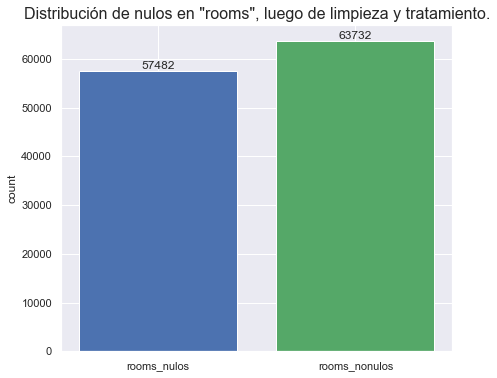

In [89]:
# Lo vemos gráficamente:

# Graficamos primero la cantidad de nulos y valores cargados.

sns.set()
fig, ax = plt.subplots(figsize = (7,6))
ax.set_ylabel('count')
ax.bar('rooms_nulos', data.rooms.isnull().sum(), color = 'b')
ax.bar('rooms_nonulos', data.rooms.notnull().sum(), color = 'g')
ax.set_title('Distribución de nulos en "rooms", luego de limpieza y tratamiento.', fontsize = 16)
for bars in ax.containers:
    ax.bar_label(bars)

In [90]:
# Analizamos con una pivot_table cómo quedó la distribución de 'rooms' luego de esta imputación. Cambia el número de bins por ser distinto el rango.

rooms_categories = pd.cut(data.rooms, bins = 4)
data.pivot_table(values='rooms', index='property_type', columns=rooms_categories, aggfunc='count', fill_value = 0)

rooms,"(-0.02, 5.0]","(5.0, 10.0]","(10.0, 15.0]","(15.0, 20.0]"
property_type,,,,
PH,3913,122,4,1
apartment,42709,679,33,8
house,13225,2540,194,34
store,246,21,3,0


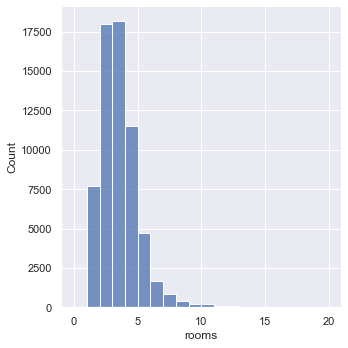

In [91]:
# ploteamos la distribucion de rooms post tranformacion y tratamiento de nulos
sns.displot(data, x="rooms", binwidth=1)

#Análisis y tratamiento de nulos columnas **surface_total_in_m2** y **surface_covered_in_m2**

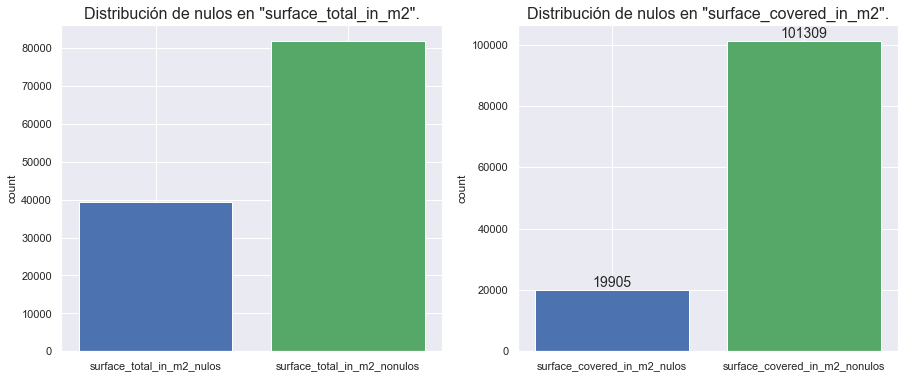

In [92]:
# Graficamos primero la cantidad de nulos y valores cargados en ambas columnas.

sns.set()
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].set_ylabel('count')
ax[0].bar('surface_total_in_m2_nulos', data.surface_total_in_m2.isnull().sum(), color = 'b')
ax[0].bar('surface_total_in_m2_nonulos', data.surface_total_in_m2.notnull().sum(), color = 'g')
ax[0].set_title('Distribución de nulos en "surface_total_in_m2".', fontsize = 16)
#for bars in ax[0].containers:
#    ax[0].bar_label(bars, fontsize = 14)
ax[1].set_ylabel('count')
ax[1].bar('surface_covered_in_m2_nulos', data.surface_covered_in_m2.isnull().sum(), color = 'b')
ax[1].bar('surface_covered_in_m2_nonulos', data.surface_covered_in_m2.notnull().sum(), color = 'g')
ax[1].set_title('Distribución de nulos en "surface_covered_in_m2".', fontsize = 16)
for bars in ax[1].containers:
    ax[1].bar_label(bars, fontsize = 14)
plt.show()

**surface_total_in_m2** antes de limpieza

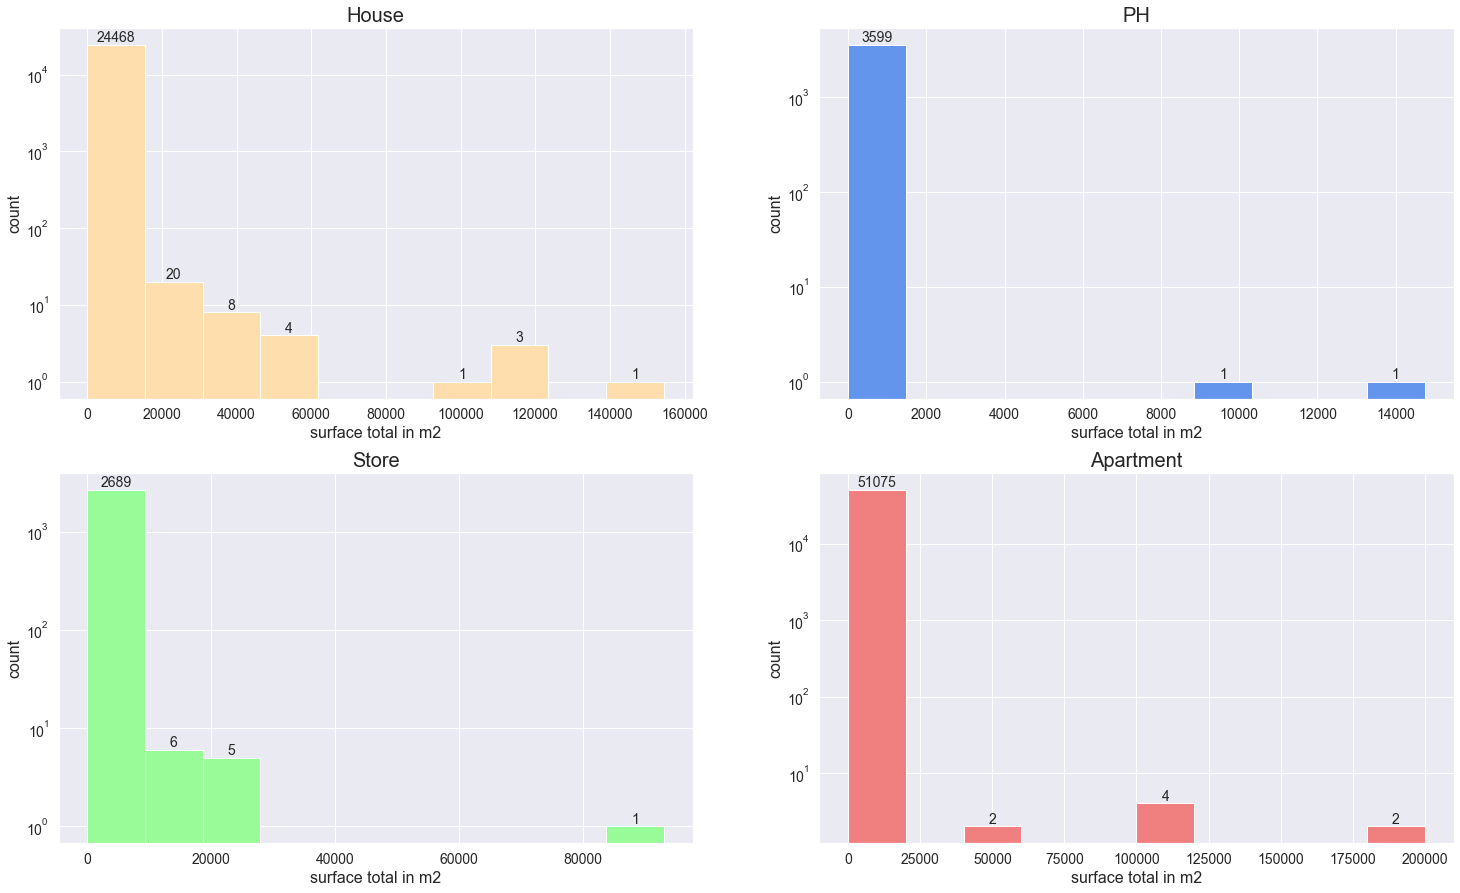

In [93]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))

ax[0,0].hist(data[(data.property_type == 'house')]['surface_total_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface total in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_total_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface total in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_total_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface total in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_total_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface total in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

**surface_covered_in_m2** antes de limpieza

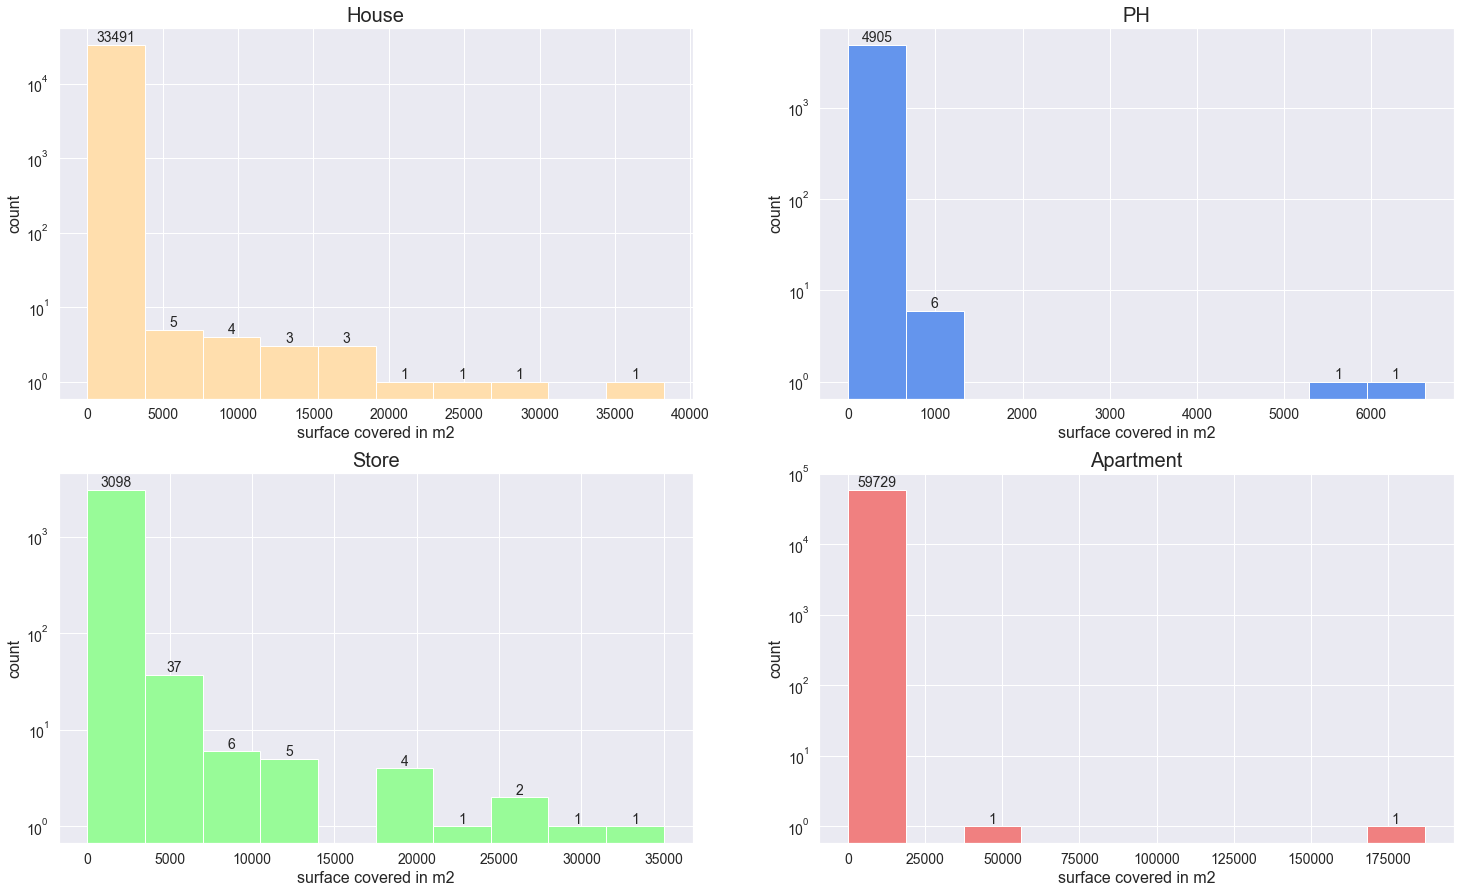

In [94]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))


ax[0,0].hist(data[(data.property_type == 'house')]['surface_covered_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface covered in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_covered_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface covered in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_covered_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface covered in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_covered_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface covered in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

In [95]:
# Ahora analizamos cómo es la distribución de los valores de superficie TOTAL con una pivot table, discriminando por 'property_type'

sup_categories = pd.cut(data.surface_total_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_total_in_m2', index='property_type', columns=sup_categories, aggfunc='count')

surface_total_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,2,4,3565,21,1
apartment,7,135,50537,146,8
house,10,16,18826,5486,53
store,2,75,2125,477,11


In [96]:
# Análogamente hacemos la misma tabla pivot pero para superficie CUBIERTA:

sup_categories = pd.cut(data.surface_covered_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_covered_in_m2', index='property_type', columns=sup_categories, aggfunc='count', fill_value = 0)

surface_covered_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,32,234,4636,11,0
apartment,207,209,59205,105,3
house,174,705,31514,1105,12
store,36,321,2337,447,14


In [97]:
# Buscaremos con REGEX los metros cuadrados totales de las propiedades en su descripción, intentando localizar patterns como:
# 'ubicado en lote de 450 m2', 'superficie total: 300 m2', '450 metros2 total', 'terreno de 30 m' y sus variantes.

patron = r'''(\d*(.|,)\d+\s?(m|metros|mts)+\s*(2|²)?\s?total)|(lote\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)|(terreno\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)|(total\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)'''
regex = re.compile(patron, flags = re.IGNORECASE)
data["superficie"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)
data['superficie'].replace(',', '.', regex=True, inplace=True)
data["superficie2"] = data.superficie.apply(lambda x: x if x is np.nan else float(re.findall(r'[\d]+', x)[0]))
data[data.superficie.notnull()][['superficie','superficie2']]

,superficie,superficie2
6,106 m2 TOTAL,106.0
10,Lote de 1514 m,1514.0
26,lote de 700 m,700.0
40,total: 138 m2,138.0
48,Total 35m2,35.0
...,...,...
121098,94 m2 total,94.0
121102,117 m2 total,117.0
121124,115 m2 total,115.0
121155,lote de 550 m2,550.0


In [98]:
# La cantidad de nulos en esta columna previo a hacer los reemplazos es:
data.surface_total_in_m2.isnull().sum()

39324

In [99]:
# Este es el número de coincidencias con el REGEX definido para superficie total.
# Hemos observado en las descripciones de las propiedades que en muchos casos no coincide la superficie total cargada con la que figura en la descripción.
# No solo vamos a rellenar los valores faltantes, sino que priorizaremos la información extraída de la 'description' por sobre la cargada en la columna surface
# haciendo un reemplazo.

# Analizamos cuantos valores previamente nulos tuvieron match y se hará un "fill":
data[data.superficie2.notnull()].surface_total_in_m2.isnull().sum()

3509

In [100]:
# Analizamos ahora cuántos matches difieren de los valores previamente cargados en la columna 'surface_total_in_m2'.

(data[(data.superficie2.notnull()) & (data.surface_total_in_m2.notnull())].surface_total_in_m2 \
        != data[(data.superficie2.notnull()) & (data.surface_total_in_m2.notnull())].superficie2).sum()

3669

In [101]:
# Encontramos la cantidad de valores que serán reemplazados por valores nuevos y más confiables, según lo visto en muchos samples de las descripciones.
# Hacemos reemplazo:

data.loc[data.superficie2.notnull(), 'surface_total_in_m2'] = data['superficie2']

In [102]:
# Observamos ahora la cantidad de valores NaN que quedaron en la columna SURFACE TOTAL, ya que no estaban cargados y no se encontraron en 'description'.
sup_total_nan_inicial = data.surface_total_in_m2.isnull().sum()
data.surface_total_in_m2.isnull().sum()

35815

In [103]:
# Una vez que imputamos los datos borramos las columnas auxiliares generadas excedentes.

data.drop(columns=['superficie','superficie2'],axis=1,inplace=True)

In [104]:
# Ahora buscaremos información de metros cubiertos (como xx m2 cubiertos, xx metros2 cubiertos, (superficie) cubierta xx m2 y sus variantes).

patron = r'''/(\d+\s?(m|metros|mts)\s*(2|²)?\s?(cubiertos))|(\d*(.|,)\d+\s?(m|metros|mts)+\s*(2|²)?\s?cubiertos)|(cubierta\s?\:?(de)?\s?\d+\s?(m|metros|mts)+\s*(2|²)?\s?)'''
regex = re.compile(patron, flags = re.IGNORECASE)
data["superficie"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)
data['superficie'].replace(',', '.', regex=True, inplace=True)
data["superficie2"] = data.superficie.apply(lambda x: x if x is np.nan else float(re.findall(r'[\d]+', x)[0]))
data[data.superficie.notnull()][['superficie','superficie2']]

,superficie,superficie2
6,78 m2 CUBIERTOS,78.0
37,75 m cubiertos,75.0
40,cubierta: 74 m2,74.0
48,cubierta: 15m2,15.0
83,cubierta: 55 m2,55.0
...,...,...
121065,100 m2 cubiertos,100.0
121097,220 m2 cubiertos,220.0
121132,CUBIERTA: 40M²,40.0
121155,.130 m2 cubiertos,130.0


In [105]:
# La idea es utilizar los valores de la columna generada 'superficie2' para imputar superficies cubiertas nulas y mal cargadas. Hay muchos registros con
# valores de superficie cargados que difieren a la descripción (o que son excesivamente grandes) y priorizaremos los que figuran en la columna 'description'.
# Mostramos algunos ejemplos de registros mal cargados:

mask_surface_10000 = data.surface_covered_in_m2 > 10000
mask_house_or_department = (data.property_type == 'house') | (data.property_type == 'apartment')
data[mask_house_or_department & mask_surface_10000][['property_type','surface_total_in_m2', 'surface_covered_in_m2', 'description']].sample(3)

,property_type,surface_total_in_m2,surface_covered_in_m2,description
120302,house,3500.0,12000.0,"Impecable casa en alquiler Lote de 3500m2 Casa distribuida en dos plantas, total 900m2 cubiertos y quincho de 300m2. En planta baja:Gran entrada en rond pua.Gran comedor con mesa para 12 personas.Amplio living con hogar TV led de 50 pulgadas y bob window al parque y pileta,Oficina al frente en suiteCocina comedor con baño de servicioToilette de recepción3 amplios dormitorios en suite con amplio vestidorDormitorio principal con 2 vestidores, jacuzzi grande con vista al parque.Play room para niños de 10mx 12mDoble circulacion en toda la casa.Calefacción por radiadores en todos los ambientes y baños.Cochera cubierta con doble porton automatico para 4 autos cómodos.Lavadero totalmente equipado, con sector de planchado, lavarropas, y una heladera grandeDependencia de servicio con baño completoBaulera con placard para ropa blanca y de inviernoParrilla y mesa familiar en galería de la casa.Vestuarios para pileta, ducha, baño completo con acceso directo del jardin. Pisos de parquet en todos los ambientes.Aire acondicionado en todos los ambientes.Gran quincho de 300m2 con dos mesas en lapacho para 18 personas cada una, mesa de pool, mesa de pin pom, sillones de estar,hogar a leña y barra para 9 personas.Cava de vinos para 32 botellas2 parrillas profesionales.1 horno de barro2 hornos pizzeros.Todo nuevo en excelente estado de conservaciónPisos de parquet.GRUPO ELECTROGENO DE 22 kva a gas, con encendido automático ante un corte de luz.Col:1029"
44241,house,1080.0,23871.0,"casa en el barrio ""El Pevero"" de Pilar Golf, desarrollada en dos plantas: Planta baja: RecepciÃ³n, Living con hogar. escritorio o play ,toilette. Cocina grande comedor diario ,living ,Playroom. Lavadero, dependencia y baÃ±o completo. Planta alta: hall de distribucion, 2 dormitorios con placard con un baÃ±o completo, suite principal con vestidor, baÃ±o,ducha escocesa, e hidromasaje. 4to dormitorio en suiteAfuera: galerÃ­a con parrilla y jardÃ­n. Sala de mÃ¡quinas. Entrada de autos y cochera cubierta para 12 autos.Pileta climatizada con sin fin y cascada ,deck de madera.Cesped (grama bahiana) con riego por aspersiÃ³n.Aberturas de PVC DVH. Pisos de porcelanato. y madera. CalefacciÃ³n por aire central, frio/calor. Techos de TejaLOCALIZACION: En FÃ¡tima, Partido de Pilar a la Altura del Km. 60,5 del Acceso Norte con entrada directa de Ã©ste Ãºltimo.EXTENSION: Aproximadamente 175 Ha. Es un predio de altÃ­sima cota, donde se afectÃ³ un Ã¡rea destinada a residencias no mayor al 35 %. Dentro de esta superficie encontramos 7 barrios denominados SOTOMAYOR, PINE VALLEY, PEEBLEBEACH, AUGUSTA, CYPRESS POINT, PEVERO Y ST. ANDREWS, 5 reservas residenciales y una reserva comercial.INFRAESTRUCTURA: El nivel de excelencia que tiene el Emprendimiento a sido tambiÃ©n objetivo de la infraestructura del mismo, Calles asfaltadas y acordonadas de doble mano. Agua Potable. Agua de riego. Alumbrado pÃºblico. Servicios pluviales. Red colectora cloacal con planta de tratamiento. Gas natural, luz, telefono, banda ancha. Seguridad. Deportes: Golf profesional, zona de practica, driving rage, putting green y pitching, fÃºtbol, tenis.Infraestructura: Club House de 4.800m2, pileta semi olÃ­mpica, lago.Sectores culturales, sociales, gastronÃ³micos y deportivos, vestuarios, gimnasio y sauna. 0 2 NOTICIASOPORTUNIDADES 8CONTACTOSPROPIEDADESBUSQUEDAETIQUETASMAPARESERVASTASACIONESEMPRENDIMIENTOSMI EMPRESADIFUSION. 2017BÃSQUEDA DE PROPIEDADESTipo de operaciÃ³n:VentaAlquilerAlquiler temporarioTipo de propiedad:TerrenoDepartamentoCasaQuintaOficinaLocalEdificio ComercialCampoCocheraNave IndustrialPHDepÃ³sitoFincasIslaRango de precio: USD ARSMin:0Max:999999999Mostrar solo disponiblesMostrar solo propiedades de NarvaezBÃºsqueda rÃ¡pida de barrio:BuscarPais:Seleccione un paisAgregar filtroFiltros aplicados:No hay filtros avanzados aplicados. Para agregar uno, utilice el boton ""Agregar filtro"".BuscarResultados esperad

In [106]:
# La cantidad de nulos en esta columna previo a hacer los reemplazos es:
sup_cub_nan_inicial = data.surface_covered_in_m2.isnull().sum()
data.surface_covered_in_m2.isnull().sum()

19905

In [107]:
# De los matches encontrados para superficie cubierta, evaluamos cuántos se utilizarán para rellenar NaN y cuántos para sobreescribir valores.

# Analizamos cuantos valores previamente nulos tuvieron match y se hará un "fill":
data[data.superficie2.notnull()].surface_covered_in_m2.isnull().sum()

812

In [108]:
# Analizamos ahora cuántos matches difieren de los valores previamente cargados en la columna 'surface_covered_in_m2'.

(data[(data.superficie2.notnull()) & (data.surface_covered_in_m2.notnull())].surface_covered_in_m2 \
        != data[(data.superficie2.notnull()) & (data.surface_covered_in_m2.notnull())].superficie2).sum()

1956

In [109]:
# Encontramos la cantidad de valores que serán reemplazados por valores nuevos y más confiables, según lo visto en muchos samples de las descripciones.
# Hacemos reemplazo:

data.loc[data.superficie2.notnull(), 'surface_covered_in_m2'] = data['superficie2']

In [110]:
# Observamos ahora la cantidad de valores NaN que quedaron en la columna SURFACE TOTAL, ya que no estaban cargados y no se encontraron en 'description'.

data.surface_covered_in_m2.isnull().sum()

19093

In [111]:
# Una vez que imputamos los datos borramos las columnas auxiliares generadas excedentes.

data.drop(columns=['superficie','superficie2'],axis=1,inplace=True)

In [112]:
# Ya completados y corregidos los valores de surface_total y surface_covered utilizando REGEX, continuaremos tratando estas columnas
# evaluando aquellas columnas que tienen uno de los dos datos cargados y el otro NaN, y también contemplando tipo de propiedad.
# Evaluamos primerro cuántos registros no tienen surface_total cargada pero sí surface_covered, por tipo de propiedad:

data[data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()].groupby('property_type')\
        .agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,1431,0
apartment,13176,0
house,9422,0
store,840,0


In [113]:
# Utilizaremos nuevamente REGEX para buscar las palabras "plantas" (ejemplo '2 plantas'), "patio" y "parque". Para los casos que NO haya match,
# emplearemos el valor de surface covered para completar el NaN en surface total, asumiendo que las propiedades no cuentan con exterior ni más de 1 planta.

patron_exterior = "(parque|patio|plantas)"
patron_exterior_regex = re.compile(patron, flags = re.IGNORECASE)
matches_exterior = data.description.apply(lambda x: np.NaN if x is np.NaN else patron_exterior_regex.search(x))
mask_sin_exterior = matches_exterior.isnull()

mask_total_null_cub_notnull = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()

# La cantidad de propiedades que tienen cargada surfacce covered, no tienen surface total y no se encontró evidencias de
# múltiples plantas o exterior en su descripción son:

(mask_sin_exterior & mask_total_null_cub_notnull).sum()

23240

In [114]:
# Procedemos entonces a hacer la imputación de la columna 'surface_total_in_m2' en estos registros:

data.loc[mask_total_null_cub_notnull & mask_sin_exterior,['surface_total_in_m2']] = data[mask_total_null_cub_notnull & mask_sin_exterior]['surface_covered_in_m2']

In [115]:
# filtramos los registros que no son casa, ya que consideramos que las casas suelen tener mayor superficie total que cubierta
mask_house = data.property_type != 'house'
mask_cubierta_total_null = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()
data[mask_cubierta_total_null & mask_house].groupby('property_type').agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,109,0
apartment,591,0
store,79,0


In [116]:
print(f'Antes de modificar las filas encontrabamos {data.surface_total_in_m2.isnull().sum()} nulos en superficie total')

Antes de modificar las filas encontrabamos 12575 nulos en superficie total


In [117]:
# rellenamos las filas que cumplen con la condicion en la columna surface total con lo que encontramos con la misma condicion en surface cubierta. Lo hacemos solo para los 'apartment'
# ya que PH y store puede ser grosero hacer esta imputación.

data.loc[(mask_cubierta_total_null) & (data.property_type == 'apartment'),['surface_total_in_m2']] = data[(mask_cubierta_total_null) & (data.property_type == 'apartment')]['surface_covered_in_m2']

In [118]:
print(f'Luego tenemos {data.surface_total_in_m2.isnull().sum()} nulos')

Luego tenemos 11984 nulos


In [119]:
# comprobamos 
data[mask_cubierta_total_null].groupby('property_type').agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,109,0
apartment,591,591
house,850,0
store,79,0


In [120]:
# Evaluamos ahora cuántos registros tienen NaN en surface_covered pero tienen cargado surface_total:

data[data.surface_total_in_m2.notnull() & data.surface_covered_in_m2.isnull()].groupby('property_type')\
        .agg('count')[['surface_covered_in_m2','surface_total_in_m2']]

,surface_covered_in_m2,surface_total_in_m2
property_type,,
PH,0,248
apartment,0,5105
house,0,2300
store,0,494


In [121]:
# Análogamente el caso anterior, para todos los casos que no encontremos información de exterior o múltiples plantas, imputaremos el valor faltante
# con la otra columna. 

mask_cub_null_total_notnull = data.surface_total_in_m2.notnull() & data.surface_covered_in_m2.isnull()

# La cantidad de propiedades que tienen cargada surfacce covered, no tienen surface total y no se encontró evidencias de exterior
# o múltiples plantas en su descripción son:

(mask_sin_exterior & mask_cub_null_total_notnull).sum()

8147

In [122]:
# Procedemos entonces a hacer la imputación de la columna 'surface_covered_in_m2' en estos registros:

data.loc[mask_cub_null_total_notnull & mask_sin_exterior,['surface_covered_in_m2']] = data[mask_cub_null_total_notnull & mask_sin_exterior]['surface_total_in_m2']

In [123]:
# Analizamos ahora valores muy grandes o muy pequeños en estas columnas y evaluaremos si los transformamos en nulos.
# Lo haremos utilizando la función .cut y .pivot_table:

sup_categories = pd.cut(data.surface_total_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_total_in_m2', index='property_type', columns=sup_categories, aggfunc='count')

surface_total_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,43,186,4814,26,1
apartment,216,226,63885,458,10
house,438,719,26280,7908,57
store,48,304,2663,577,10


In [124]:
# Asumimos que las propiedades de <= 10 m2 de superficie total son datos cargados erróneamente (corresponde a una propiedad de poco más de 3m x 3m).
# Transformaremos esos valores en NaN por ser considerados no válidos. Lo mismo haremos con las propiedades que ocupen más de una manzana completa y NO
# sean tipo 'store', ya que hemos visto que hay 'stores' como depositos o fábricas que corresponden a varias hectareas de terreno.

data.loc[data.surface_total_in_m2 <= 10, 'surface_total_in_m2'] = np.NaN
data.loc[(data.surface_total_in_m2 >= 10000) & (data.property_type != 'store'), 'surface_total_in_m2'] = np.NaN

In [125]:
# El mismo análisis hacemos para superficie cubierta con valores erróneos:
sup_categories = pd.cut(data.surface_covered_in_m2, [0, 10, 20, 500, 10000, 500000])
data.pivot_table(values='surface_covered_in_m2', index='property_type', columns=sup_categories, aggfunc='count', fill_value = 0)

surface_covered_in_m2,"(0, 10]","(10, 20]","(20, 500]","(500, 10000]","(10000, 500000]"
property_type,,,,,
PH,38,217,4904,19,1
apartment,235,253,64120,181,5
house,358,724,33475,1675,20
store,61,320,2777,514,9


In [126]:
# La única diferencia es que dejaremos aquellas casas y PH de > 10000 m2 ya que pueden tratarse de propiedades de más de una planta:

data.loc[data.surface_covered_in_m2 <= 10, 'surface_covered_in_m2'] = np.NaN
data.loc[(data.surface_covered_in_m2 >= 10000) & (data.property_type == 'apartment'), 'surface_covered_in_m2'] = np.NaN

In [127]:
# Finalmente, la cantidad porcentual de NaN que quedaron en la columna 'surface_total_in_m2' es:
round(data.surface_total_in_m2.isnull().sum() *100 / data.shape[0],1)

10.9

In [128]:
# Respecto al porcentaje inicial de :
round(sup_total_nan_inicial * 100 / data.shape[0],1)

29.5

In [129]:
# Análogamente, para la superficie cubierta el remanente de datos nulos porcentualmente es:
round(data.surface_covered_in_m2.isnull().sum() *100 / data.shape[0],1)

9.9

In [130]:
# Respecto al porcentaje inicial de:
round(sup_cub_nan_inicial * 100 / data.shape[0],1)

16.4

In [131]:
# Analizamos rápidamente las propiedades de mayor superficie para tipo 'store' y 'PH'.

In [132]:
aux_indexes = list(data[data.property_type == 'PH'].surface_covered_in_m2.nlargest(3).index)

In [133]:
data.loc[pd.Index(aux_indexes),:]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title,tipo_de_cambio,provincia,ciudad_partido,barrio
39810,PH,Plottier,|Argentina|Neuquén|Plottier|,Neuquén,3840885.0,-38.959451,-68.058992,200000.0,USD,3528900.0,200000.0,NaN,14742.0,13.566680,NaN,NaN,NaN,NaN,"Venta de Nuevo proyecto urbanístico ""LOTEO LOS ALAMOS"" A pocos metros de la ruta nacional N° 22 el terreno cuenta con 14.742 m2 de superficie, con planos aprobados para realizar un loteo que dispone de extensos 26 lotes de 16 metros de frente con 25 metros de fondo para desarrollos habitacionales distribuidos en sectores con una calle interna que conecta todo los lotes hacia una sola entrada, dando tranquilidad y disposición de barrio abierto con aspecto de barrio cerrado. El loteo se encuentra a solo 7km de la ciudad y a pocos metros del acceso a la circunvalación, que con la ruta nueva conectan al parque industrial de la ciudad de Neuquen en pocos minutos. el desarrollo se vende en bloque completo, siendo esta una excelente oportunidad de inversion por consultas y/o visitas Cel:2994624535 - - YJ SOLUCIONES INMOBILIARIAS",PH EN VENTA,17.6445,Neuquén,Plottier,NaN
39382,PH,Pinamar,|Argentina|Buenos Aires Costa Atlántica|Pinamar|,Buenos Aires Costa Atlántica,3429971.0,-37.132977,-56.876654,40000.0,USD,705780.0,40000.0,9435.0,9435.0,91.954023,NaN,NaN,NaN,NaN,"Venta de Lote , OSTENDELote unifamiliarmz 430 lote 9435 m2Consultenos¡¡¡ - - TEYCA S.A. INMOBILIARIA",PH EN VENTA,17.6445,Buenos Aires Costa Atlántica,Pinamar,NaN
62259,PH,Ramos Mejía,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza|Ramos Mejía|,Bs.As. G.B.A. Zona Oeste,3429617.0,-34.655100,-58.553180,93000.0,USD,1640938.5,93000.0,58.0,5889.0,1603.448276,15.792155,NaN,3.0,NaN,Hermoso ph de tres ambientes muy amplio dos habitaciones altillo amplio lavadero amplia y hermosa terraza propia apto credito. - Publicado a traves de VisualGestion -,PH en Venta Ramos Mejia / La Matanza (A154 604),17.6445,Bs.As. G.B.A. Zona Oeste,La Matanza,Ramos Mejía


In [134]:
# Observamos que las dos primeras propiedade son lotes sin construir y que están mal los datos cargados de surface covered. Los pasaremos a np.NaN.

aux_indexes = list(data[data.property_type == 'PH'].surface_covered_in_m2.nlargest(2).index)
data.loc[pd.Index(aux_indexes),'surface_covered_in_m2'] = np.NaN

In [135]:
# Evaluamos también la cantidad de propiedades cuya relación sup total sea menor a los 20 m2 (que sería 4m x 5 m) y que son PH o House, ya que hay normativas sobre el tamaño mínimo de los lotes
# para edificaciones residenciales.

data[(data.surface_total_in_m2 <= 20) & ((data.property_type == 'house')|(data.property_type == 'PH'))].shape[0]

905

In [136]:
# Sampleamos algunas para ver sus descripciones.

data[(data.surface_total_in_m2 <= 20) & ((data.property_type == 'house')|(data.property_type == 'PH'))][['surface_total_in_m2', 'surface_covered_in_m2', 'description']].sample(5)

,surface_total_in_m2,surface_covered_in_m2,description
40985,20.0,20.0,Corredor Responsable: SABRINA COCCONI - CSI 6258Contacto: Leonardo Menini - MLS ID # 420801018-3ACEPTO PERMUTA Y OFERTA RAZONABLE. Lote 8.66 m de frente x 34.6 m de fondo. Local de 6 m de frente x 5 m a reciclar. La casa tiene garaje cubierto para un auto y un patio(8X4m) con galería techada. Living comedor con cocina integrada y lavadero. Dos domitorios con un baño completo. Playroom que balconea al living comedor Jardin de 14 metros libres de fondo.
59053,20.0,20.0,"Corredor Responsable: Uno Bienes Raices SRL - CMCPSI 5821Contacto: Damián Dell' Olio - MLS ID # 420041249-45P.H. DE GRANDES DIMENSIONES A RECICLAR EN RAMOS MEJÍA. Planta alta realizada a nuevo (Obra no finalizada en terminaciones). ideal emprendimiento educativo o vivienda para familia numerosa, Ubicado y Emplazado en Ramos Mejía, Zona en constante crecimiento y desarrollo. Muy cercano a Av. Rivadavia a Av. San Martin, estación de tren, estación de colectivos y comercio. SIN EXPENSAS. ESCUCHO OFERTAS!! NO ES APTO CREDITO!! Comparte lote con solo otras dos unidades. Con una pequeña inversión podes adaptar la propiedad a gusto y necesidad generando, también, una inversión rentable en una futura re-venta. Consultame! M2 totales= 144m2"
19411,20.0,20.0,"Corredor Responsable: Juan Manuel Quiroga - CPCPI 5191Contacto: Elena Sanabria Dure - MLS ID # 420431036-46RESIDENCIA CON PILETA EN DESPEÑADEROS. OPORTUNIDAD DE INVERSIÓN EN ZONA DE CATEGORIA CON 990 m2 DE SUPERFICIE. La propiedad se encuentra en el B° Residencial de la ciudad de Despeñaderos. Por Ruta 36 y a metros de la Terminal de Omnibus. Ciudad caracterizada por su entorno seguro y parquizado. El B° Residencial se compone de casas de categoría, además del balneario cercano que valorizan su inversión. En 990 m2 de superficie de terreno se construyeron 90 m2 distribuídos en: - Dormitorio en suite - 3 baños - Ambiente abierto de sala - cocina -comedor - Quincho asador - Pileta ¡¡SE ESCUCHAN PROPUESTAS NEGOCIABLES!! Despeñaderos es una localidad y un municipio del departamento Santa María, provincia de Córdoba, Argentina. Se ubica a 50 km al sur de la capital provincial, por ruta pavimentada RN36, y a 31 km al sudeste de Alta Gracia, por rutas RPC45 y RN36. Está a 452 m de altitud, a orillas del río Segundo. ESCRITURA - PLANOS - IMPUESTOS AL DIA - SERVICIOS BASICOS!! Agendamos muestra..."
52991,20.0,20.0,"Corredor Responsable: Martin Veltri - CMQ 805Contacto: Analía Jaurretche - MLS ID # 420531040-15En este Hermoso Barrio de Chacras Laguna Vitel, en Chascomús, se Vende esta casa de Excelente estado general, desarrollada en planta,baja y planta alta emplazada sobre lote de 18.558.26 mts cercano a la entrada del barrio. Casa de 5 ambientes muy amplios. En planta baja living comedor con cocina integrada, tres habitaciones y un baño. En planta alta una habitación Calefacción por tiro balanceado, espectacular jardín con muy buenos arboles. Para destacar: La casa es sumamente luminosa, esta rodeada de galería con parrilla . Medidas aproximadas de la casa 126 metros. Superficie descubierta en Planta Baja 53,60 mts. Martillero Interviniente Martín Veltri. Ubicación: Tomar autopista ruta 2 a Mar del Plata. En el km 114 tomar la entrada a Chascomús. Hacer 1 km y tomar la ruta 20 a la derecha. Desde ahí, son 10 km hasta la entrada. (TIEMPO ESTIMADO: 1 HORA 20 MINUTOS DESDE AV. LIBERTADOR Y CERRITO) Características del Barrio Dimensiones: 320 hectáreas de campo. 138 chacras, con un promedio de 1,5 hectáreas. (15.000 m2) 100 hectáreas de espacio común. Exclusiva Zona Club House: Casco de 240 m2, con vista a la laguna. Pileta de natación con solarium y pileta para niños. Cancha de fútbol 8 de pasto, iluminada. 2 canchas de tenis, cancha de bochas y estacionamiento. Zona Náutica: Muelle, rampas y amarraderos. Galpón para guardar material náutico (remos, motores pequeños, tablas, etc.). Muelles en espacios comunes. Estacionamiento para autos y trailers. Zona Hípi

In [137]:
# Observamos que hay datos mal cargados y otros que fueron extraídos erróneamente por Regex por encontrar, por ejemplo, la primera medida del lote (por ejemplo el ancho en mts).
# Convertimos estos valores en np.NaN ya que son erróneos.

data.loc[(data.surface_total_in_m2 <= 20) & ((data.property_type == 'house')|(data.property_type == 'PH')), 'surface_total_in_m2'] = np.NaN

In [138]:
# Para los departamentos que tengan < 18 m2 de superficie total o cubierta hacemos lo mismo.

data[(data.surface_total_in_m2 < 18) & (data.property_type == 'apartment')].shape[0]

56

In [139]:
data.loc[(data.surface_total_in_m2 < 18) & (data.property_type == 'apartment'), 'surface_total_in_m2'] = np.NaN

In [140]:
data[(data.surface_covered_in_m2 < 18) & (data.property_type == 'apartment')].shape[0]

55

In [141]:
data.loc[(data.surface_covered_in_m2 < 18) & (data.property_type == 'apartment'), 'surface_covered_in_m2'] = np.NaN

In [142]:
# Analizamos rápidamente las propiedades tipo 'house' con muy alta superficie cubierta:

data[(data.property_type == 'house') & (data.surface_covered_in_m2 > 30000)][['surface_covered_in_m2', 'description']]

,surface_covered_in_m2,description
24752,1000450.0,"Son 2 lotes. Cada 2 de 500 metrosTotal 1000450 mts cubiertos aprox.5 Cabañas, cada cabaña tiene 70 metrosSon 2dor, Cocina. Comedor y baño, cochera-El quincho de aproximadamente 80metrosLa pileta. Como se ve esta. Recien revestida. Con luces de led Y cascada. Que filtra el aguaSon 5 cabañas todas de Ladrillo vistoLoza y tejasSistema de camaras de seguridad con monitoreo, alarma, reflectores Led.Tv Smart en todas las cabañas, Directv, parquisados.40 mts de la ruta (Av. Carcano).PRECIO USD $600.000 (MUY BUENA FINANCIACIÓN)Se muestra sin compromiso.Matriculados:Pablo D. ResolaniC.P.C.P.I. 4717Cel. 06Adrian F. SilvestriC.P.C.P.I. 5005Cel. 53"
27856,60270.0,"Increible chalet de gran categoria Lote 8, 66 x 60270 m2 cubiertos + 50 semicubiertosLiving comedor muy amplio toilette de recepcioncocina comedor diario1 dormitorio en suite con vestidor1 suite junior2 dormitorios que comparten otro bao completosalon de estar con vista al jardinAmplio jardin con quincho y parrillaEn PA1 dormitorio bao lavaderoCalefaccion centralTodo muy ventilado y luminoso .Publicado por Maceiro Propiedades a traves INMOMAP"
32012,38247.0,"UBICADO EN COLINAS DE PERALTA RAMOSLote de 10,30 X 38247 mts2 cubiertosDesarrollado en dos plantasModerno, recicladoAcceso automatizado, rejas al frenteLivingComedor diarioBaño con box de duchaAmplia y cómoda cocina comedor con vista al parqueGarage cubierto para dos autos, quincho con parrilla con acceso al parqueTrotadoraEn planta alta:Baño completo3 DormitoriosAmplio dormitorio principal con balcón saliente en suite, vestidor e hidromasajeCalefacción individual por radiadoresLas superficies mencionadas son aproximadas y al solo efectoorientador, los valores pueden ser modificados sin previo avisoCONSULTE SU VALOR"
37807,55500.0,"CASA ESTILO TUDOR DESARROLLADA EN DOS PLANTAS, INGRESO PRINCIPAL A GRAN LIVING COMEDOR CON PISOS DE PINOTEA Y PISOS DAMERO CIELORRASO EN YESO CON MOLDURAS, A CONTINUACION COMEDOR DIARIO CON PISOS DE PINOTEA, HOGAR A LEÑOS Y YESO EN CIELORRASO, SALA DE ESTAR CON HOGAR, CIELORRASO EN MADERA Y PISO CERAMICO COMBINADO CON TIRANTES DE MADERA. UN BAÑO TOILETTE. COCINA CON BARRA DESAYUNADORA, MUEBLES BAJO MESADA Y SOBRE MESADA EN MADERA Y MARMOL, CON VENTNAS DE VIDRIO REPARTIDO CON VISTA AL PARQUE. PATIO JARDIN CON DRIVE IN Y ACCESO A COCHERAS, QUINCHO PARRILLERO CON BAÑO Y ENTREPISO CON HABITACION DE HUESPEDES.PLANTA ALTA: INGRESO POR ESCALERA DE MADERA A ESTAR DISTRIBUIDOR, COMUNICANDO A 4/5 DORMITORIOS, EL PRINCIPAL EN SUITE CON VESTIDOR Y EL BAÑO REVESTIDO EN MARMOL CON JACUZZI.2 BAÑOS MAS PARA EL RESTO DE LOS DORMITORIOS Y SALIDA A GRAN BALCON CON VISTA AL PARQUE. MEDIDAS 12.X 55500MTS2 CUBIERTOS.FRIO CALOR POR CONDUCTOSCASA DE EXCELENTE ESTADO CONSERVACION Y TERMINACION PATIO JARDIN CON DRIVE INMatriculado:Victor Hugo AlagnaCEIR 886Tel. 840 // 4262557 // 4268725"
39221,38240.0,"Terreno de 20mts frente x 60mts fondo, Total 1200 m2 con frentes a calle principal y al Canal. Lote subdivididle, quedando lote 1 de 490m2 a calle principal y lote 2 de 710m2 al Canal con Amarra propia de 18mts de largo (eslora) Superficie Cubierta: 382.40m2, Superficie Semi Cubierta: 99.71m2. Superficie aprobada sin construir 12.80m2 (en lote 1, hoy es la cochera cubierta)Superficie Total 494.91 m2PB: hall de recepciÃ³n, Comedor, Living, Sala de Estar todo a patio interno cerrado conformando un ambiente abierto muy grande. Lleno de Luz. Dormitorio de huÃ©spedes o Escritorio. Toilette. Cocina Completa. Dependencia de servicio con su baÃ±o. Sala de mÃ¡quinas. Quincho cubierto con bacha y muebles de guardado, incorporado al patio interno cerrado con ventanales al JardÃ­n.PA: Hall de distribuciÃ³n o Family. 2 dormitorios en Semi Suite con baÃ±o compartimentado. Suite Jr., Master Suite de 6x4 con vestidor, baÃ±o compartimentado y BalcÃ³n Terraza hacia el Canal vista Abierta. Exterior: Parque con Pileta de 12 x 3.50. Amarra de 18mts largo (eslora). Entrada al frente de a casa pa

In [143]:
# Encontramos que los datos están mal cargados en la descripcción así que los imputaremos como nulos:

data.loc[(data.property_type == 'house') & (data.surface_covered_in_m2 > 30000), 'surface_covered_in_m2'] = np.NaN

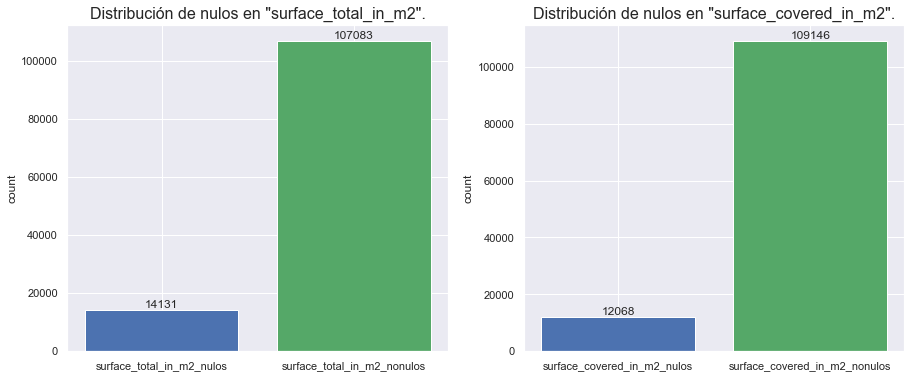

In [144]:
# Vemos entonces nuevamente el gráfico hecho al principio de esta sección, pero luego del tratamiento de datos:

sns.set()
fig, ax = plt.subplots(1, 2, figsize = (15,6))
ax[0].set_ylabel('count')
ax[0].bar('surface_total_in_m2_nulos', data.surface_total_in_m2.isnull().sum(), color = 'b')
ax[0].bar('surface_total_in_m2_nonulos', data.surface_total_in_m2.notnull().sum(), color = 'g')
ax[0].set_title('Distribución de nulos en "surface_total_in_m2".', fontsize = 16)
for bars in ax[0].containers:
    ax[0].bar_label(bars)
ax[1].set_ylabel('count')
ax[1].bar('surface_covered_in_m2_nulos', data.surface_covered_in_m2.isnull().sum(), color = 'b')
ax[1].bar('surface_covered_in_m2_nonulos', data.surface_covered_in_m2.notnull().sum(), color = 'g')
ax[1].set_title('Distribución de nulos en "surface_covered_in_m2".', fontsize = 16)
for bars in ax[1].containers:
    ax[1].bar_label(bars)
plt.show()

**surface_total_in_m2** despues de limpieza

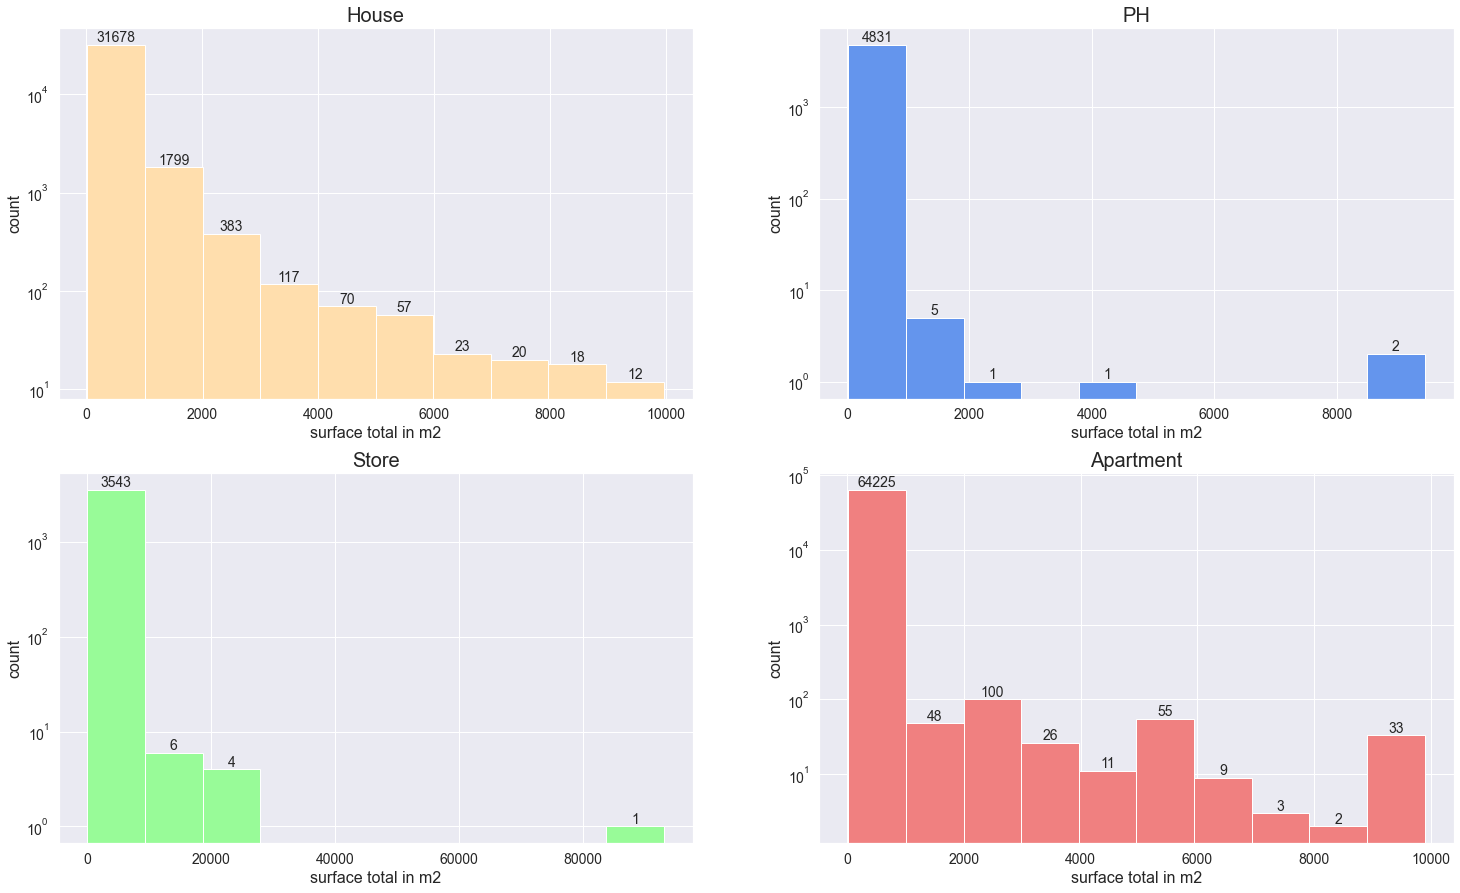

In [145]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))

ax[0,0].hist(data[(data.property_type == 'house')]['surface_total_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface total in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_total_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface total in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_total_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface total in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_total_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface total in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

**surface_covered_in_m2** despues de limpieza

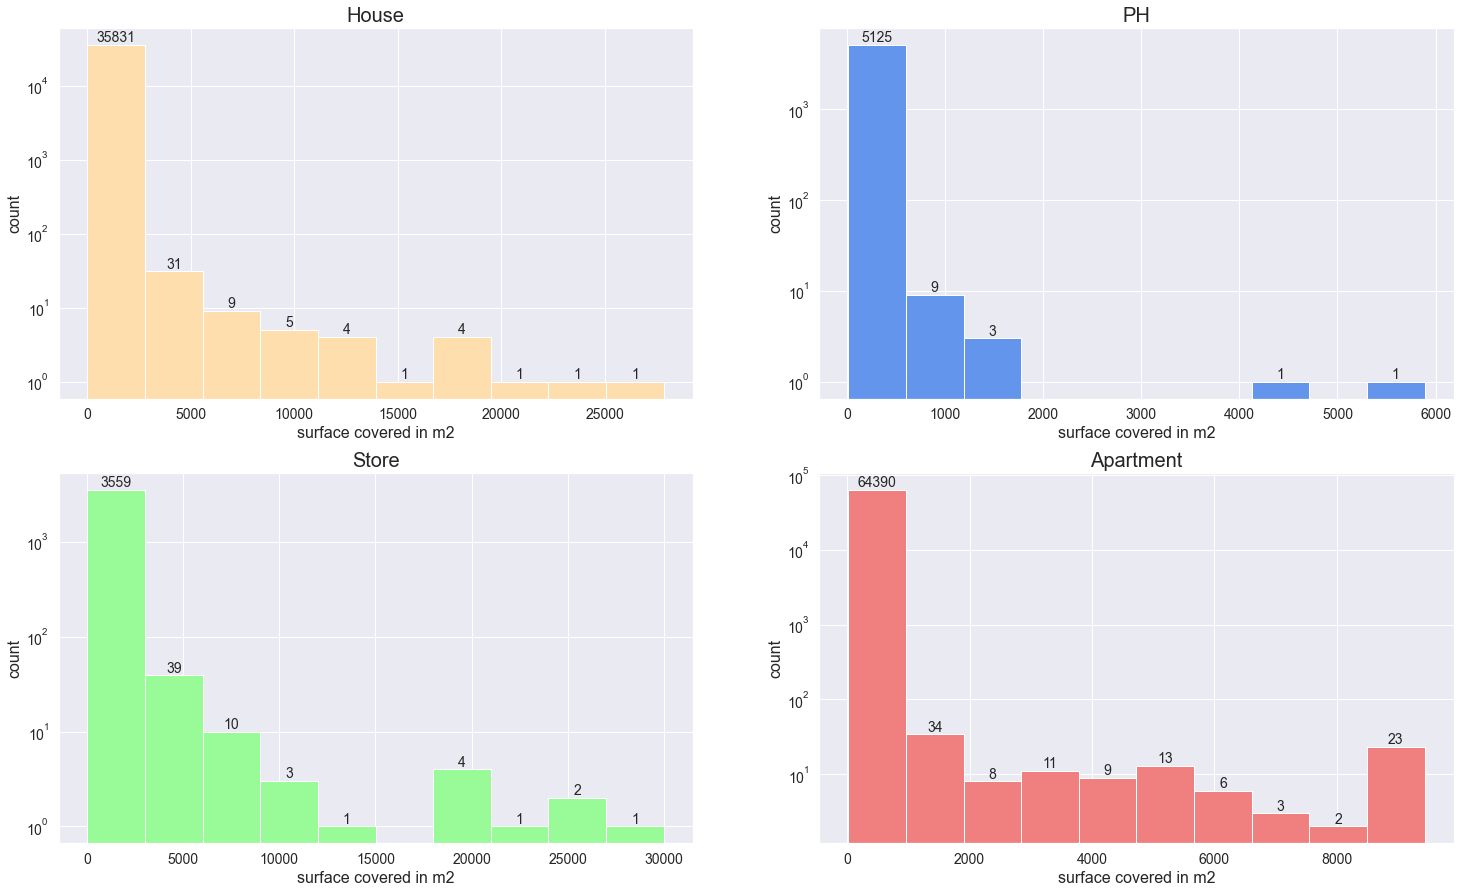

In [146]:
sns.set()
fig, ax = plt.subplots(2, 2, figsize = (25,15))


ax[0,0].hist(data[(data.property_type == 'house')]['surface_covered_in_m2'],facecolor='navajowhite')
ax[0,0].set_title('House', fontsize = 20)
ax[0,0].set_xlabel('surface covered in m2', fontsize=16)
ax[0,0].set_ylabel('count', fontsize=16)
ax[0,0].set_yscale("log")
ax[0,0].tick_params(axis='both', which='major', labelsize=14)
ax[0,0].tick_params(axis='both', which='minor', labelsize=14)
plt.ticklabel_format(style='plain')
for bars in ax[0,0].containers:
    ax[0,0].bar_label(bars, fontsize = 14)

ax[0,1].hist(data[(data.property_type == 'PH')]['surface_covered_in_m2'],facecolor='cornflowerblue')
ax[0,1].set_title('PH', fontsize = 20)
ax[0,1].set_xlabel('surface covered in m2', fontsize=16)
ax[0,1].set_ylabel('count', fontsize=16)
ax[0,1].set_yscale("log")
ax[0,1].tick_params(axis='both', which='major', labelsize=14)
ax[0,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[0,1].containers:
    ax[0,1].bar_label(bars, fontsize = 14)

ax[1,0].hist(data[(data.property_type == 'store')]['surface_covered_in_m2'],facecolor='palegreen')
ax[1,0].set_title('Store', fontsize = 20)
ax[1,0].set_xlabel('surface covered in m2', fontsize=16)
ax[1,0].set_ylabel('count', fontsize=16)
ax[1,0].set_yscale("log")
ax[1,0].tick_params(axis='both', which='major', labelsize=14)
ax[1,0].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,0].containers:
    ax[1,0].bar_label(bars, fontsize = 14)

ax[1,1].hist(data[(data.property_type == 'apartment')]['surface_covered_in_m2'],facecolor='lightcoral')
ax[1,1].set_title('Apartment', fontsize= 20)
ax[1,1].set_xlabel('surface covered in m2', fontsize=16)
ax[1,1].set_ylabel('count', fontsize=16)
ax[1,1].set_yscale("log")
ax[1,1].tick_params(axis='both', which='major', labelsize=14)
ax[1,1].tick_params(axis='both', which='minor', labelsize=14)
for bars in ax[1,1].containers:
    ax[1,1].bar_label(bars, fontsize = 14)

plt.show()

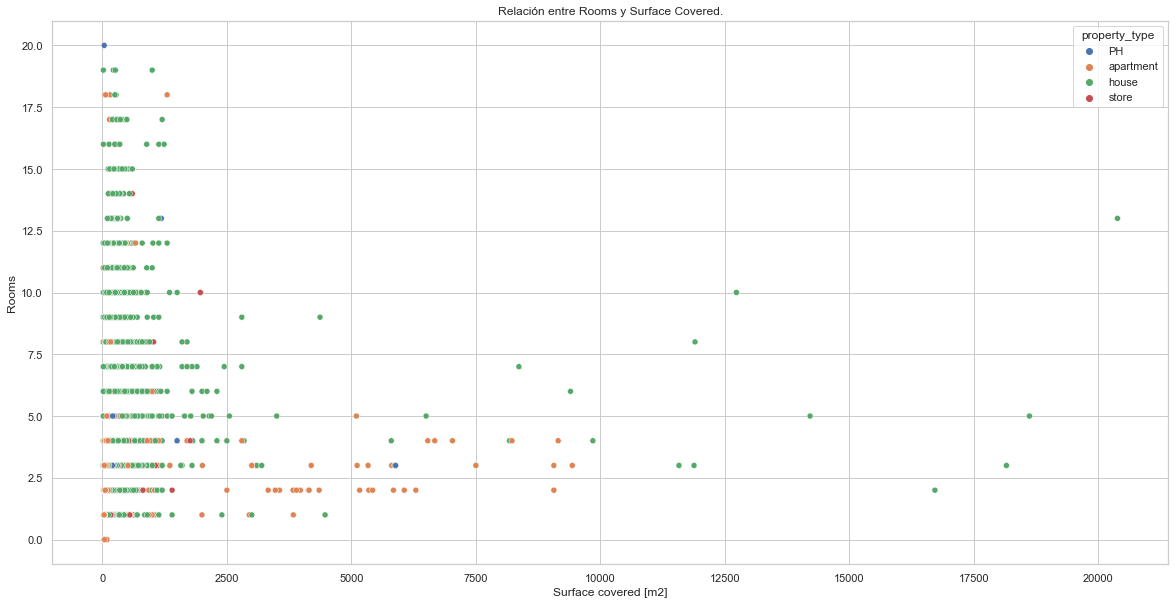

In [147]:
# Graficamos un scatterplot luego del tratamiento las columnas de surface y rooms para intentar identificar valores atípicos.

fig = plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.scatterplot(data=data, x="surface_covered_in_m2", y="rooms", hue = 'property_type')
plt.xlabel("Surface covered [m2]"); plt.ylabel("Rooms");plt.title("Relación entre Rooms y Surface Covered.")
plt.show()

In [148]:
# Se observa que hay propiedades com poca superficie y muy alto número de Rooms. Estos valores deberían analizarse y posiblemente imputarse como np.NaN. Se realizará en caso de disponer con el tiempo.

#Análisis y tratamiento de nulos columnas **Precio**

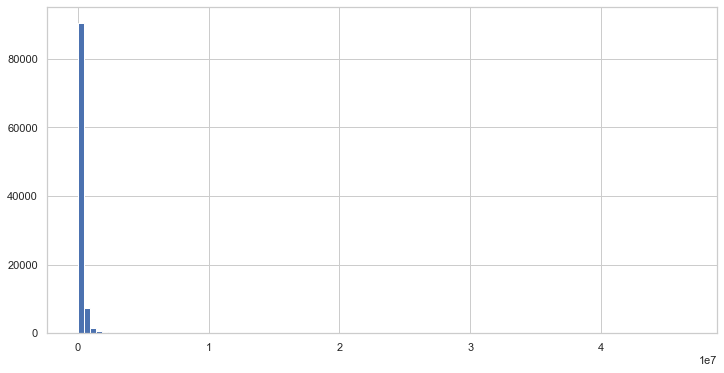

In [149]:
# distribucion de surface_total_in_m2 antes de tratamiento de nulos filtrando menores de 1000 m2

plt.hist(data['price_aprox_usd'],bins=100);

In [150]:
patron = r'(u\$s|usd)\s?[\d]*[.|,][\d]+'

regex = re.compile(patron, flags = re.IGNORECASE)

data["price_en_descrip"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)

In [151]:
data["price_en_descrip"].replace(',','.',regex=True, inplace=True)
data[data.price_en_descrip.notnull()].price_en_descrip

24          USD71.000
25         USD 71.800
28         USD 72.500
60        U$S 173.000
71        U$S 105.000
             ...     
121139      U$S 2.017
121143    U$S 305.000
121214      U$S 1.338
121217     USD 20.000
121218     u$s 95.900
Name: price_en_descrip, Length: 7528, dtype: object

In [152]:
# extraemos los numeros de lo encontrado en la descripcion
data["price_en_descrip2"] = data.price_en_descrip.apply(lambda x: np.nan if x is np.nan else float(re.findall(r'[\d]+[.|,]?[\d]+', x)[0])*1000)
data[data["price_en_descrip2"].notnull()][['price_aprox_usd','price_en_descrip2']].sample(10)

,price_aprox_usd,price_en_descrip2
52038,255000.0,258000.0
26242,37000.0,36800.0
60,173000.0,173000.0
40565,60000.0,60000.0
99954,160000.0,160000.0
90908,430000.0,430000.0
106481,235000.0,235000.0
3891,NaN,80000.0
5154,123000.0,133500.0
88367,105600.0,25000.0


In [153]:
# hay mas de 400 registros que conseguimos obtener el precio, revisar que algunos son bajos porque pusieron el precio de alquiler en la descripcion
with pd.option_context('display.max_colwidth', 10000):
  display(data[data.price_en_descrip2.notnull()][['price','price_en_descrip2']])

,price,price_en_descrip2
24,355000.0,71000.0
25,358550.0,71800.0
28,362150.0,72500.0
60,173000.0,173000.0
71,115000.0,105000.0
...,...,...
121139,80523.0,2017.0
121143,305000.0,305000.0
121214,NaN,1338.0
121217,131500.0,20000.0


In [154]:
with pd.option_context('display.max_colwidth', 200):
  display(data[data.price_en_descrip2.notnull()].nsmallest(20, 'price_en_descrip2')[['description','price_en_descrip2']])

,description,price_en_descrip2
2775,"Edificio en construcción de 14 pisos, 4000 mts 2, con cocheras, pileta de natación y espacios recreativos, dptos de 1 y 2 dormitorios, valor de preventa U$S 1.000 el mts2 valor terminado entre U$S...",1000.0
5194,"Excelente departamento de 3 ambientes, rafaccionado totalmente Pintado. (Pisos, Muebles, Cañerias en muy buen estado), Ubicado en la zona mas hermosa de Las Cañitas.APTO CRÉDITO!!!ALQUILER TEMPOR...",1000.0
18890,"Edificio Park Plaza Recoleta, monoambiente amplisimo, cochera fija, excelente categoría, detalles de terminación de lujo , gran baño con terminaciones de marmol, cocina integrada, pisos de madera...",1000.0
29461,Departamento de 1 ambiente amplio a la calle con cochera fija en Punta Mogotes con vista lateral al mar. A una cuadra del mar y de las playas de Punta Mogotes. Puede financiarse entregando un 70% ...,1000.0
44298,"Importante casa estilo inglÃ©s en Olivos de unos 75 aÃ±os .Muy seÃ±orial. .Ambiente hogareÃ±o,construida en 2 plantas.Aberturas en madera en excelente estado. Planta Baja: JardÃ­n de invierno. Com...",1000.0
74019,"Departamento 156m², Argentina, Capital Federal, por U$S 1.000.960",1000.0
93971,Espectacular propiedad a metros de Av Juan B. Justo! Excelente estado y detalles de gran categoría! DISTRIBUCIÓN - PB: Garage para 4 autos (3 cubiertas) / 2 dormitorios/ 2 baños / cocina y amplio ...,1000.0
97469,"Vendo o alquilo departamento en zona Molas López.Descripción:- Dos dormitorios, con placares y aire acondicionado tipo split,- Un baño familiar, - Amplio living comedor integrado con aire acondici...",1000.0
97685,de Departamento 2 AMBIENTES en La Lucila del MarMedidas:3.50 x 3.15Dorm. 3.00 x 3.00Comedor 7.00 x 3.15Patio 5.80 x 3.80Excelente departamento de 3 ambientes en inmejorable ubicacion.A tan solo 15...,1000.0
97788,de Departamento 2 AMBIENTES en La Lucila del MarMedidas:Living 3.50 x 3.15Dorm. 3.00 x 3.00Comedor 7.00 x 3.15Patio 5.80 x 3.80Excelente departamento de 3 ambientes en inmejorable ubicacion.A tan ...,1000.0


In [155]:
# procedemos con la imputadion de los precios encontrados en la columna aprox_usd ya que buscamos solo precios en dolares
# los valores atipicos seran tratados luego de la imputacion
data.price_aprox_usd.fillna(data['price_en_descrip2'], inplace=True)


In [156]:
data.drop(columns=['price_en_descrip','price_en_descrip2'],axis=1,inplace=True)

In [157]:
#Comparar valores nulos de price para poder buscar un reemplazo en otra columna, vamos a calcular el precio que imputamos para las otras columnas
mask_price = data['price'].isnull()
data.loc[mask_price,['currency','price_aprox_usd','price_aprox_local_currency']].notnull().sum()

currency                        0
price_aprox_usd               561
price_aprox_local_currency      0
dtype: int64

In [158]:
data.loc[(data.price.isnull() & data.price_aprox_usd.notnull()),'currency'] = 'USD'

In [159]:
data.loc[(data.price.isnull() & data.price_aprox_usd.notnull()),'price_aprox_local_currency'] = (17.65) * data.price_aprox_usd

In [160]:
data.loc[mask_price,['currency','price_aprox_usd','price_aprox_local_currency']].notnull().sum()

currency                      561
price_aprox_usd               561
price_aprox_local_currency    561
dtype: int64

#Análisis y tratamiento de nulos columna **expensas**

In [161]:
# Buscando con la palabra 'expensas' encontramos registros que marcaban expensas bajas o sin expensas, pero no un precio
# Entonces buscamos encontrar precio en valores para poder reemplazarlo en expensas asumiendo que los precios en la descripcon seran siempre en USD

patron = r'(\$)\s?[\d]*[.|,][\d]+'

regex = re.compile(patron, flags = re.IGNORECASE)

data["price_posible_expensas"] = data.description.apply(lambda x: np.nan if x is np.nan else regex.search(x).group() if regex.search(x) else np.nan)

In [162]:
data["price_posible_expensas"].replace(',','.',regex=True, inplace=True)
data[data.price_posible_expensas.notnull()].price_posible_expensas.value_counts()

$1.500       86
$ 1.500      77
$ 6.000      76
$2.000       71
$1.200       68
             ..
$ 442.92      1
$ 2682.90     1
$ 3860.77     1
$ 89.533      1
$145.000      1
Name: price_posible_expensas, Length: 2216, dtype: int64

In [163]:
data.expenses.fillna(data['price_posible_expensas'], inplace=True)

In [164]:
#Una vez que imputamos los datos borramos las columnas exedentes 
data.drop(columns=['price_posible_expensas'],axis=1,inplace=True)

In [165]:
# La imputacion de datos fue imperceptible con respecto al total
print(f'El porcentaje de nulos ahora es: {round(data.expenses.isnull().sum()/data.shape[0] * 100,2)}%')

El porcentaje de nulos ahora es: 82.65%


# Cálculco columna **price per m2**
Dado que las propiedades fueron cargadas en diferente currency, encontramos que el calculo de precio por m2 no es claro, por ende decidimos volver a calcularlo.

Para el nuevo cálculo vamos a usar la columna surface total como primera opción, y en los casos donde esta misma sea nula vamos a utilizar superficie cubierta.

In [166]:
# el calculo de las columnas de precio por superficie no es claro y no diferencia las diferentes monedas (USD, ARS, UYU, PER)
data[data.price.notnull()][['price', 'currency','price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2','price_per_m2','price_usd_per_m2']].sample(5)

,price,currency,price_aprox_usd,surface_covered_in_m2,surface_total_in_m2,price_per_m2,price_usd_per_m2
69430,162200.0,USD,162200.0,40.0,49.0,4055.000000,3310.204082
80245,150000.0,USD,150000.0,30.0,30.0,5000.000000,5000.000000
66756,53000.0,USD,53000.0,75.0,75.0,706.666667,NaN
112970,120000.0,USD,120000.0,95.0,120.0,1263.157895,1000.000000
34837,70000.0,USD,70000.0,50.0,50.0,1400.000000,1400.000000


In [167]:
# calculamos primero para cuanto surface total no es nulo
data.loc[data.surface_total_in_m2.notnull(),['recalculo_price_usd_per_m2']] = data['price_aprox_usd'] / data['surface_total_in_m2']

In [168]:
# calculamos cuando surface total es nulo y cubierta no
data.loc[data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull(),['recalculo_price_usd_per_m2']] = data['price_aprox_usd'] / data['surface_covered_in_m2']

In [169]:
# notemos que en el registro 121119 donde la currency es pesos el recalculo es diferente, es decir que en el recalculo podemos comparar todas las filas ya que tienen misma currency
data[data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()][['price','currency','surface_covered_in_m2','surface_total_in_m2', 'price_per_m2','recalculo_price_usd_per_m2']]


,price,currency,surface_covered_in_m2,surface_total_in_m2,price_per_m2,recalculo_price_usd_per_m2
111,160000.0,USD,90.0,NaN,1777.777778,1777.777778
212,820000.0,ARS,29.0,NaN,28275.862069,1585.814138
213,1200000.0,ARS,45.0,NaN,26666.666667,1495.564667
286,650000.0,USD,300.0,NaN,2166.666667,2166.666667
297,455000.0,USD,290.0,NaN,1568.965517,1568.965517
...,...,...,...,...,...,...
120645,NaN,NaN,580.0,NaN,NaN,NaN
120656,NaN,NaN,280.0,NaN,NaN,NaN
120955,270000.0,USD,197.0,NaN,1370.558376,1370.558376
121065,115000.0,USD,100.0,NaN,1150.000000,1150.000000


In [170]:
# procedemos a borrar las columnas que ya no son de utilidad y tienen informacion incongruente
data.drop(columns=['price_per_m2','price_usd_per_m2'],axis=1, inplace=True)
data.rename(columns={'recalculo_price_usd_per_m2':'price_usd_per_m2'}, inplace=True)

# Análisis columna **description** usando regex
Buscamos diferentes tipos de caracteristicas que podrian agregarle valor a las viviendas y lo guardamos en una nueva variable


**Pileta**

In [171]:
patron = "(pileta|piscina|pile)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["pileta"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con pileta: {data.pileta.sum()}')

La cantidad de propiedades con pileta: 32895


**Cochera**

In [172]:
patron = "(cocheras|cochera)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["cochera"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con cochera: {data.cochera.sum()}')

La cantidad de propiedades con cochera: 42438


**Gimnasio**

In [173]:
patron = "(musculacion|fitness|gimnasio|gym)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["gimnasio"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con gimnasio: {data.gimnasio.sum()}')

La cantidad de propiedades con gimnasio: 9582


**Seguridad**

In [174]:
patron = "(seguridad)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["seguridad"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con seguridad: {data.seguridad.sum()}')

La cantidad de propiedades con seguridad: 11366


**Sum**

In [175]:
patron = "(sum|salon)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["salon"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con sum: {data.salon.sum()}')

La cantidad de propiedades con sum: 16042


**Parrilla**

In [176]:
patron = "(parrilla)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["parrilla"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con parrilla: {data.parrilla.sum()}')

La cantidad de propiedades con parrilla: 34036


**Balcon o terraza**

In [177]:
patron = "(terraza|balcon)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["balcon"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades con balcon: {data.balcon.sum()}')

La cantidad de propiedades con balcon: 37729


**A estrenar**

In [178]:
patron = "(estrenar)"
regex = re.compile(patron, flags = re.IGNORECASE)

data["estrenar"] = data.description.apply(lambda x: 0 if x is np.nan else 1 if regex.search(x) else 0)
print(f'La cantidad de propiedades a estrenar: {data.estrenar.sum()}')

La cantidad de propiedades a estrenar: 10611


# Tratamiento de duplicados

In [179]:
# El criterio que utilizamos para encontrar los duplicados es que los registros contengan misma descripción, geonames_id, precio en dolares, y superficie total
# Definimos este criterio ya que nos parece correcto utilizar una variable de precio, una geografica y una de superficie para encontrar duplicados, ademas de la descripcion
# De este modo nos abtraemos de eliminar filas con la misma descripcion generica, probablemente cargadas por agencias inmobiliarias, pero que no son la misma propiedad
duplicados = data[data.duplicated(keep="first",subset=['description', 'geonames_id','price_aprox_usd','surface_total_in_m2'])][['price_aprox_usd','description','geonames_id','surface_total_in_m2']].sort_values(by='geonames_id')


In [180]:
with pd.option_context('display.max_colwidth', 500):
  display(duplicados)

,price_aprox_usd,description,geonames_id,surface_total_in_m2
44246,320000.0,"LindÃ­sima casa, desarrollada en dos planta, sobre lote de mas de 15.000m2 en Chacras del ParanÃ¡. Encontramos en planta baja, 3 dormitorios, un baÃ±o completo, living comedor con cocina integrada con barra. Pisos de cemento alisado, calefacciÃ³n por radiadores, equipos de aire acondicionado, cortinas blackout en todos los ambientes. Dependencias de servicio y lavadero, gran quincho con fogÃ³n, parrilla y piscina.En planta alta, se encuentra la suite principal, escritorio, vestidor y baÃ±o. ...",3427212.0,NaN
44245,950000.0,"MagnÃ­fica casa desarrollada en una planta, sobre dos chacras que totalizan mas de 3ha, con frente a laguna interna.Ingreso a ambiente principal, donde el living junto al hogar da sensaciÃ³n de calidez a la casa, y espacio comedor con mesa para 8 personas. Todo con espectaculares vistas al jardin parquizado y la laguna. Al lado del comedor, a un cuarto que aloja la bodega. Cocina. Toilette.Sobre un ala de la casa, dos cuartos en suite mas depÃ³sito. El otro ala, aloja la master suitede casa ...",3427212.0,NaN
81553,125000.0,PH 3 AMB A ESTRENAR EN DUPLEX CON COCHERA CUBIERTA 82M2 + BALCON - AMPLIO LIV-COM COCINA INTEGRADA TOIL 2 DOR BAÃ‘O COMPLETO BALCON - 1 CUADRA ESTACION VIRREYES Y AVELLANEDA - 6 CUADRAS AV PERON - FINANCIO EN OBRA - TOMO PARTE DE PAGO. VENTA EN PESOSCLAUDIO PARRA PROPIEDADESCASA CENTRAL: Av. Fleming 2698 - MartínezTelefono: (rotativas)SUCURSAL: Ibera 5089 - PB 1 (1431) VILLA URQUIZATelefono: / 1941,3427354.0,NaN
81566,125000.0,PH 3 AMB A ESTRENAR EN DUPLEX CON COCHERA CUBIERTA 82M2 + BALCON - AMPLIO LIV-COM COCINA INTEGRADA TOIL 2 DOR BAÃ‘O COMPLETO BALCON - 1 CUADRA ESTACION VIRREYES Y AVELLANEDA - 6 CUADRAS AV PERON - FINANCIO EN OBRA - TOMO PARTE DE PAGO. VENTA EN PESOSCLAUDIO PARRA PROPIEDADESCASA CENTRAL: Av. Fleming 2698 - MartínezTelefono: (rotativas)SUCURSAL: Ibera 5089 - PB 1 (1431) VILLA URQUIZATelefono: / 1941,3427354.0,NaN
36981,69000.0,"Av. Francisco Rabanal 3500, CABA / departamento 5 ambientes / 2 baños / sin expensas / 88M2 / u$s 69000 Link video propiedad https:// Link para ver mas fotos http:// Gran departamento 5 ambientes! ubicado en la Av. Intendente Francisco Rabanal 3500, Capital Federal, a 2 cuadras de Av Roca y Mariano Acosta y a 2 cuadras de Av Roca y Lafuente.Es un departamento con 4 dormitorios, uno de ellos esta atrás del living comedor, ideal para unificarlo y hacer un inmenso living comedor.Esta ubicado e...",3427366.0,88.0
...,...,...,...,...
120267,125000.0,"Con una ubicación privilegiada, a pocas cuadras de la estación de Lomas de Zamora y a metros del centro comercial de la ciudad, Carlos Pellegrini 168 es un emprendimiento de 10 plantas con departamentos de 2; 3 y 4 ambientes. Las unidades se destacan por su iluminación y ventilación natural, con espacios de grandes dimensiones y amplias visuales del entorno. La calidad constructiva y el confort hacen de Carlos Pellegrini 168 un producto inmejorable.CARACTERÍSTICAS:- COCHERAS FIJAS EN PB- AMP...",NaN,50.0
120270,126000.0,"Con una ubicación privilegiada, a pocas cuadras de la estación de Lomas de Zamora y a metros del centro comercial de la ciudad, Carlos Pellegrini 168 es un emprendimiento de 10 plantas con departamentos de 2; 3 y 4 ambientes. Las unidades se destacan por su iluminación y ventilación natural, con espacios de grandes dimensiones y amplias visuales del entorno. La calidad constructiva y el confort hacen de Carlos Pellegrini 168 un producto inmejorable.CARACTERÍSTICAS:- COCHERAS FIJAS EN PB- AMP...",NaN,50.0
120273,127000.0,"Con una ubicación privilegiada, a pocas cuadras de la estación de Lomas de Zamora y a metros del centro comercial de la ciudad, Carlos Pellegrini 168 es un emprendimiento de 10 plantas con departamentos de 2; 3 y 4 ambientes. Las unidades se destacan por su iluminación y ventilación natural, con espacios de grandes dimensiones y amplias visuales del entorno. La calidad constructiva y el conf

In [181]:
print(f'El dataframe antes de eliminar duplicados tenia {len(data)} filas')


El dataframe antes de eliminar duplicados tenia 121214 filas


In [182]:
# por default deja la primer fila y borra todas sus copias
data.drop_duplicates(subset=['description', 'geonames_id','price_aprox_usd','surface_total_in_m2'],keep='first' ,inplace=True)

In [183]:
# Pasamos de un data set de 121 mil filas a uno de 114 mil, por ende se eliminaron alrededor de 7 mil filas que contenian duplicados, lo cual representa un 5.8% del total
print(f'Luego de eliminar los duplicados tiene {len(data)} filas')

Luego de eliminar los duplicados tiene 114207 filas


#Analsis de registros con nulos en precio luego de imputacion y limpieza

In [184]:
mask_price_null = data.price_aprox_usd.isnull()
mask_price_notnull= data.price_aprox_usd.notnull()
mask_surface_notnull= data.surface_total_in_m2.notnull() | data.surface_covered_in_m2.notnull()

In [185]:
data[mask_price_notnull & mask_surface_notnull][['price_aprox_usd','surface_total_in_m2',	'surface_covered_in_m2','provincia','ciudad_partido',	'barrio']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,provincia,ciudad_partido,barrio
0,62000.0,55.0,40.0,Capital Federal,Capital Federal,Mataderos
2,72000.0,55.0,55.0,Capital Federal,Capital Federal,Mataderos
4,64000.0,35.0,35.0,Buenos Aires Costa Atlántica,Mar del Plata,Centro
6,130000.0,106.0,78.0,Bs.As. G.B.A. Zona Norte,Vicente López,Munro
7,138000.0,45.0,40.0,Capital Federal,Capital Federal,Belgrano
...,...,...,...,...,...,...
121215,870000.0,113.0,93.0,Capital Federal,Capital Federal,Belgrano
121216,498000.0,360.0,360.0,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar
121217,131500.0,46.0,39.0,Capital Federal,Capital Federal,Villa Urquiza
121218,95900.0,48.0,48.0,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón


# Graficamos para ver los datos luego de imputacion y limpieza

## Precio por m2 promedio por tipo de propiedad

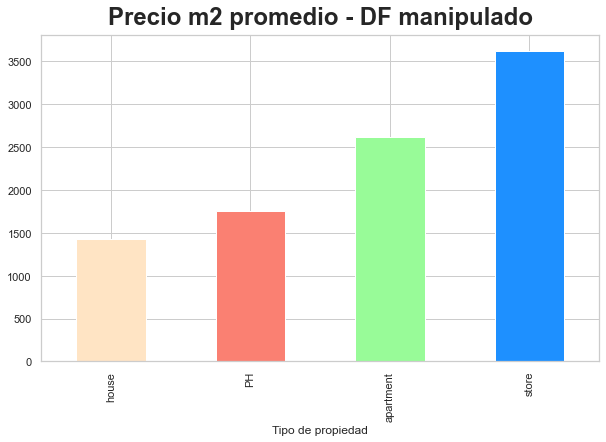

In [186]:
#Generamos un barplot para poder ver el precio promedio del valor del m2 segun el tipo de propiedad
h = data.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
h.plot.bar(figsize=(10,6), color=['bisque', 'salmon', 'palegreen', 'dodgerblue'])
plt.xlabel('Tipo de propiedad')
plt.title('Precio m2 promedio - DF manipulado', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

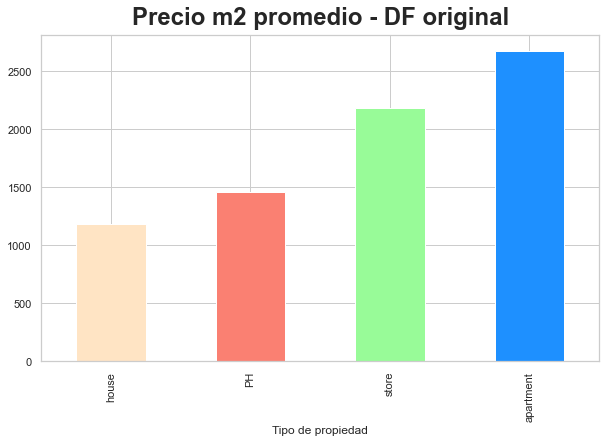

In [187]:
# usamos df, la variable donde guardamos el dataset original, que luego copiamos a data y fuimos transformando
df_promedio = df.groupby('property_type').mean()['price_usd_per_m2'].sort_values()
df_promedio.plot.bar(figsize=(10,6), color=['bisque', 'salmon', 'palegreen', 'dodgerblue'])
plt.xlabel('Tipo de propiedad')
plt.title('Precio m2 promedio - DF original', fontdict = {'fontsize': 24,'verticalalignment': 'bottom'}, weight='bold')
plt.show()

##Relacion precio superficie

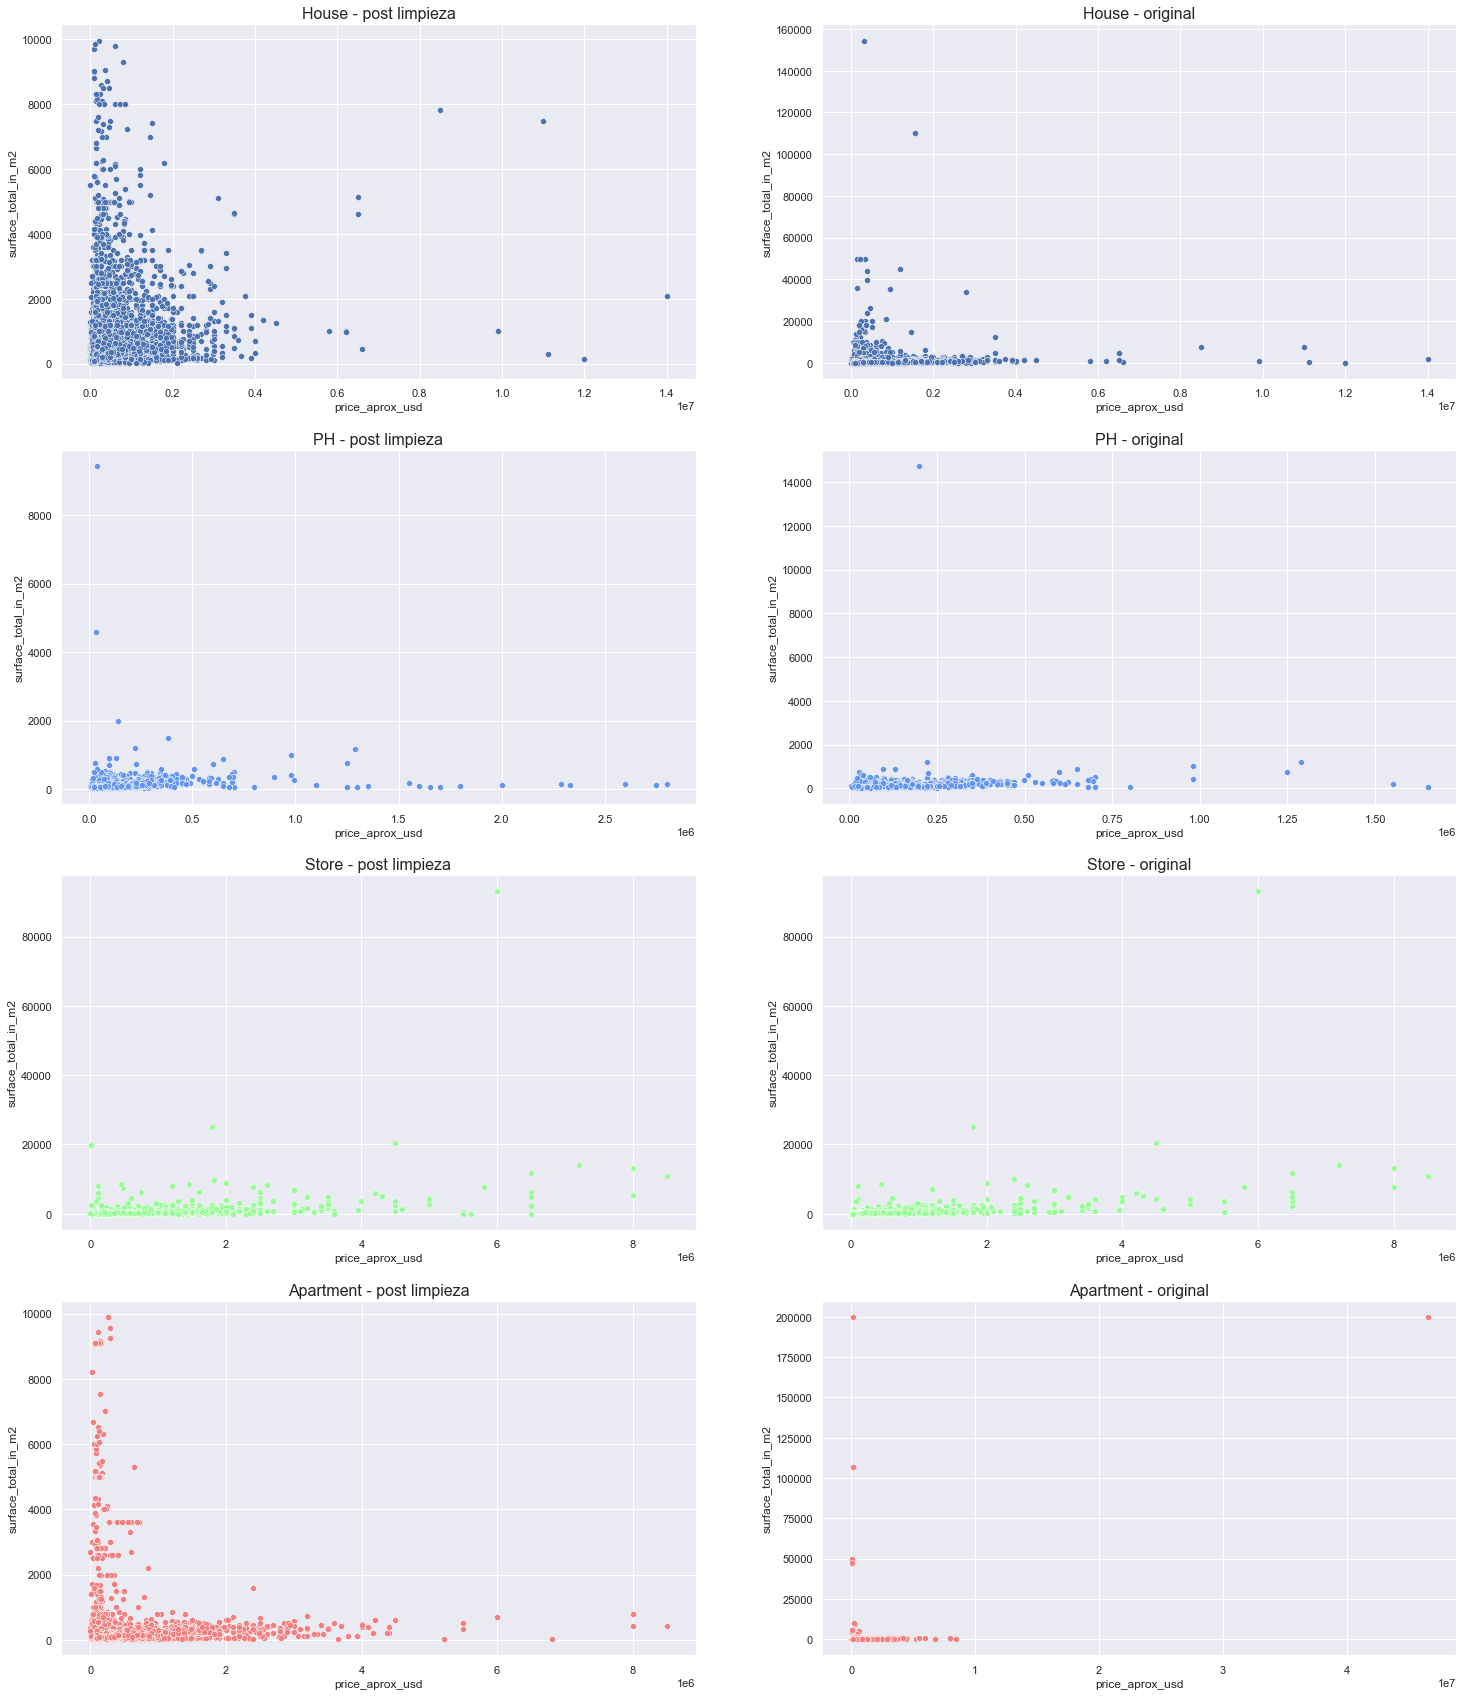

In [188]:
sns.set()
fig, ax = plt.subplots(4, 2, figsize = (25,30))

sns.scatterplot(data=data[(data.property_type == 'house')], x="price_aprox_usd", y="surface_total_in_m2", ax=ax[0,0])
ax[0,0].set_title('House - post limpieza', fontsize = 16)
sns.scatterplot(data=df[(df.property_type == 'house')], x="price_aprox_usd", y="surface_total_in_m2", ax=ax[0,1])
ax[0,1].set_title('House - original', fontsize = 16)

sns.scatterplot(data=data[(data.property_type == 'PH')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='cornflowerblue', ax=ax[1,0])
ax[1,0].set_title('PH - post limpieza', fontsize = 16)
sns.scatterplot(data=df[(df.property_type == 'PH')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='cornflowerblue', ax=ax[1,1])
ax[1,1].set_title('PH - original', fontsize = 16)

sns.scatterplot(data=data[(data.property_type == 'store')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='palegreen', ax=ax[2,0])
ax[2,0].set_title('Store - post limpieza', fontsize = 16)
sns.scatterplot(data=df[(df.property_type == 'store')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='palegreen', ax=ax[2,1])
ax[2,1].set_title('Store - original', fontsize = 16)

sns.scatterplot(data=data[(data.property_type == 'apartment')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='lightcoral', ax=ax[3,0])
ax[3,0].set_title('Apartment - post limpieza', fontsize= 16)
sns.scatterplot(data=df[(df.property_type == 'apartment')], x="price_aprox_usd", y="surface_total_in_m2", facecolor='lightcoral', ax=ax[3,1])
ax[3,1].set_title('Apartment - original', fontsize= 16)

plt.show()

# Guardamos trabajo realizado en un archivo

Guardamos el trabajo en un archivo csv para luego utilizarlo en el modelo que vamos a realizar 

In [189]:
#Exportamos el dataframe a un archivo csv
data.to_csv('data\properati_limpio.csv')